# DAEN 690 Capstone Project

## Import Libraries

In [184]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import warnings
import numpy as np
from datetime import datetime, timedelta
import warnings

## Importing Dataset, Creating DataFrame, and Standardizing Data

### Import Dataset

In [185]:
#load Dataset
#Example input for file name is USM00072528-data.txt
file = input("Please enter file name: ")
#Entering in the city name will be used for the plots in the EDA section
city = input("Please input the station's city name: ")
df = pd.read_csv(file, sep = '\t', header = None)

In [186]:
#Raw Text File
df

,0
0,#USM00072501 1994 09 03 00 2314 166 ncdc6301 ...
1,21 0 102470B 20 190B 400 140 310 ...
2,20 12 101800B 76B 187B 425 131 315 ...
3,10 48 100000 229B 181B 347 159 327 ...
4,10 324 92500 888B 119B 449 116 339 ...
...,...
3680829,20 8445 1363 28580B -569B 31 235 63 ...
3680830,20 8521 1315 28807B -562B 32 235 50 ...
3680831,20 8525 1309 28833B -561B 32 235 46 ...
3680832,20 8601 1262 29067B -558B 30 238 51 ...


In [187]:
#This saves the id_number to be used in the standardize_dataset function
id_number = file.split('-')[0]

In [188]:
#This function helps to standardize the dataset using the following steps:
#1. Parsing the text file
#2. Assiging the parsed text to columns in our DataFrame
#3. Combining the header records and data records
#4. Dropping any null rows
#5. Assigning the correct data types to our columns
#6. Adding date and datetime values
#7. Returning the standardized DataFrame
def standardize_dataset(id_number, df):
#Header Records    
    id_ = []
    year = []
    month = []
    day = []
    hour = []
    reltime = []
    numlev = []
    p_src = []
    np_src = []
    lat = []
    lon = []
#Data Records    
    lvltyp1 = []
    lvltyp2 = []
    etime = []
    press = []
    pflag = []
    gph = []
    zflag = []
    temp = []
    tflag = []
    rh = []
    dpdp = []
    wdir = []
    wspd = []

#Parsing data from text file        
    for line in df[0]:
        if id_number in line:
            id_.append(line[0:12].strip())
            year.append(line[13:17].strip())
            month.append(line[17:20].strip())
            day.append(line[20:23])
            hour.append(line[23:26])
            reltime.append(line[27:31])
            numlev.append(line[33:36])
            p_src.append(line[37:45])
            np_src.append(line[46:54])
            lat.append(line[56:62])
            lon.append(line[64:71])
            lvltyp1.append(None)
            lvltyp2.append(None)
            etime.append(None)
            press.append(None)
            pflag.append(None)
            gph.append(None)
            zflag.append(None)
            temp.append(None)
            tflag.append(None)
            rh.append(None)
            dpdp.append(None)
            wdir.append(None)
            wspd.append(None)
        else:
            id_.append(None)
            year.append(None)
            month.append(None)
            day.append(None)
            hour.append(None)
            reltime.append(None)
            numlev.append(None)
            p_src.append(None)
            np_src.append(None)
            lat.append(None)
            lon.append(None)
            lvltyp1.append(line[0:1].strip())
            lvltyp2.append(line[1:2].strip())
            etime.append(line[3:8].strip())
            press.append(line[9:15].strip())
            pflag.append(line[15:16].strip())
            gph.append(line[16:21].strip())
            zflag.append(line[21:22].strip())
            temp.append(line[22:27].strip())
            tflag.append(line[27:28].strip())
            rh.append(line[28:33].strip())
            dpdp.append(line[33:39].strip())
            wdir.append(line[40:45].strip())
            wspd.append(line[46:51].strip())

#Adding parsed data to data frame.    
    df = pd.DataFrame({
        'id_': id_,
        'year': year,
        'month': month,
        'day': day,
        'hour': hour,
        'reltime': reltime,
        'numlev': numlev,
        'p_src': p_src,
        'np_src': np_src,
        'lat': lat,
        'lon': lon,
        'lvltyp1': lvltyp1,
        'lvltyp2': lvltyp2,
        'etime': etime,
        'press': press,
        'pflag': pflag,
        'gph': gph,
        'zflag': zflag,
        'temp': temp,
        'tflag': tflag,
        'rh': rh,
        'dpdp': dpdp,
        'wdir': wdir,
        'wspd': wspd})
    
 #Combining header and data rows.    
    df['id_'].fillna(method = 'ffill', inplace = True)
    df['year'].fillna(method = 'ffill', inplace = True)
    df['month'].fillna(method = 'ffill', inplace = True)
    df['day'].fillna(method = 'ffill', inplace = True)
    df['hour'].fillna(method = 'ffill', inplace = True)
    df['reltime'].fillna(method = 'ffill', inplace = True)
    df['numlev'].fillna(method = 'ffill', inplace = True)
    df['p_src'].fillna(method = 'ffill', inplace = True)
    df['np_src'].fillna(method = 'ffill', inplace = True)
    df['lat'].fillna(method = 'ffill', inplace = True)
    df['lon'].fillna(method = 'ffill', inplace = True)

#Drop any null rows    
    df = df.dropna()

#Assigning Data Types
    df['id_'] = df['id_'].astype(str)
    df['year'] = df['year'].astype(int)
    df['month'] = df['month'].astype(int)
    df['day'] = df['day'].astype(int) 

    df['hour'] = df['hour'].astype(int)
    df['reltime'] = df['reltime'].astype(int)
    df['numlev'] = df['numlev'].astype(int)
    df['p_src'] = df['p_src'].astype(str)
    df['np_src'] = df['np_src'].astype(str)
    df['lat'] = df['lat'].astype(int)
    df['lon'] = df['lon'].astype(int)
    df['lvltyp1'] = df['lvltyp1'].astype(int)
    df['lvltyp2'] = df['lvltyp2'].astype(int)
    df['etime'] = df['etime'].astype(str)
    df['press'] = df['press'].astype(int)
    df['pflag'] = df['pflag'].astype(str)
    df['gph'] = df['gph'].astype(int)
    df['zflag'] = df['zflag'].astype(str)
    df['temp'] = df['temp'].astype(int)
    df['tflag'] = df['tflag'].astype(str)
    df['rh'] = df['rh'].astype(int)
    df['dpdp'] = df['dpdp'].astype(int)
    df['wdir'] = df['wdir'].astype(int)
    df['wspd'] = df['wspd'].astype(int)
    
#Standardizing Date    
    df['date'] = pd.to_datetime(df[['month', 'day', 'year']])

#Standardizing Datetime
#Make sure that etime values of -9999 and -8888 are not calculated as this will return an error
    df['etime'] = df['etime'].replace(['-9999', '-8888'], '0')
    
#Ensure every etime value is the same length
    df['etime'] = df['etime'].apply(lambda x: x.zfill(5) if x != '0' else '00000')
    
#Calculate actual hours which is first 3 values of etime divided by 60. The integer value from the dvision will 
#than be added to the launch time our to get our actual hour time.
    df['actual_hours'] = df.apply(lambda row: int(row['etime'][:3]) // 60 + row['hour'] if row['hour'] != 99 else int(row['etime'][:3]) // 60, axis=1)
    
#Minutes is calculated by the first 3 values of etime modulo 60.
    df['minutes'] = df['etime'].str[:3].astype(int) % 60
    
#Seconds is the last two digits of etime. 
    df['seconds'] = df['etime'].str[-2:].astype(int)
    
#Combining the hours, minutes, and seconds.
    df['combined_time'] = pd.to_timedelta(df['actual_hours'], unit='h') + \
                 pd.to_timedelta(df['minutes'], unit='m') + \
                 pd.to_timedelta(df['seconds'], unit='s')
    
#Combining date and combined time
    df['timestamp'] =  df['date'] + df['combined_time']
    
#Drop combined time value
    df.drop(columns = ['combined_time'], inplace = True)
    
    return df

In [189]:
#Standardized DataFrame
print(city)
warnings.simplefilter(action = 'ignore', category = FutureWarning)
df_std = standardize_dataset(id_number, df)
df_std

Upton


,id_,year,month,day,hour,reltime,numlev,p_src,np_src,lat,...,tflag,rh,dpdp,wdir,wspd,date,actual_hours,minutes,seconds,timestamp
1,#USM00072501,1994,9,3,0,2314,166,ncdc6301,ncdc6301,408650,...,B,400,140,310,26,1994-09-03,0,0,0,1994-09-03 00:00:00
2,#USM00072501,1994,9,3,0,2314,166,ncdc6301,ncdc6301,408650,...,B,425,131,315,31,1994-09-03,0,0,12,1994-09-03 00:00:12
3,#USM00072501,1994,9,3,0,2314,166,ncdc6301,ncdc6301,408650,...,B,347,159,327,50,1994-09-03,0,0,48,1994-09-03 00:00:48
4,#USM00072501,1994,9,3,0,2314,166,ncdc6301,ncdc6301,408650,...,B,449,116,339,67,1994-09-03,0,3,24,1994-09-03 00:03:24
5,#USM00072501,1994,9,3,0,2314,166,ncdc6301,ncdc6301,408650,...,B,490,103,341,62,1994-09-03,0,4,12,1994-09-03 00:04:12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3680829,#USM00072501,2024,2,24,12,1112,133,ncdc-nws,,408650,...,B,31,235,63,164,2024-02-24,13,24,45,2024-02-24 13:24:45
3680830,#USM00072501,2024,2,24,12,1112,133,ncdc-nws,,408650,...,B,32,235,50,127,2024-02-24,13,25,21,2024-02-24 13:25:21
3680831,#USM00072501,2024,2,24,12,1112,133,ncdc-nws,,408650,...,B,32,235,46,122,2024-02-24,13,25,25,2024-02-24 13:25:25
3680832,#USM00072501,2024,2,24,12,1112,133,ncdc-nws,,408650,...,B,30,238,51,170,2024-02-24,13,26,1,2024-02-24 13:26:01


## Functions

### Relative Humidity to Ice

Relative Humidity to Ice Equation
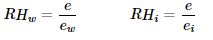
Saturation Water Vapor Pressure
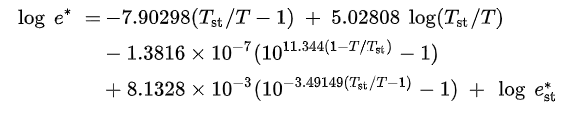
Saturation Water Vapor Pressure Over Ice
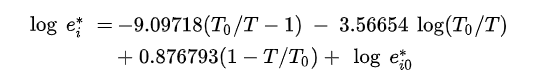

In [190]:
#Calculating Relative Humidity to Ice Steps
#1. Create an empty array to store the rh_ice values
#2. If not a null value proceed
#3. Standardize relative humidity to a decimal value
#4. Calculate saturation water vapor pressure
#5. Calculate saturation water vapor pressure over ice
#6. Calculate actual vapor pressure
#7. Calculate relative humidity to ice
#8. Return relative humidity to ice values

def relative_humidity_to_ice(temp_k, rh_w):
    
    # Initialize an empty array to store all calculations to be returned
    rh_ice = np.empty(len(temp_k))
    
    # Create a condition that if the value is not one of the following, the value is saved
    condition = (temp_k != -9999) & (temp_k != -8888) & (rh_w != -9999) & (rh_w != -8888)

    # Calculate rh_ice for non-null values
    t_non_null = temp_k[condition]
    #We divide first by 10 to standardize relative humidity (rh) to a percentage (ex: 11 = 1.1%). 
    #We than convert the percentage into a decimal value by dividing by 100. 
    rh_w_non_null = (rh_w[condition] / 10) / 100  
    
    # Ensure temperature is a non-zero number so we do not divide by 0. 
    t = t_non_null[t_non_null != 0]
    
    #Values needed for Goff-Gratch Equation
    t_st = 373.13 #steam-point temperature
    e_st = 1013.25 #steam-point pressure
    to = 273.16 #ice-point (triple point) temperature
    e_i0 = 6.1173 #ice-point pressure
    
    #Calculate log_ew (Saturation Water Vapor Pressure)
    log_ew = -7.90298 * (t_st / t - 1) + 5.02808 * np.log10(t_st / t) \
             - 1.3816e-7 * (10**(11.344 * (1 - t / t_st)) - 1) \
             + 8.1328e-3 * (10**(-3.49149 * (t_st / t - 1)) - 1) + np.log10(e_st)
    ew = np.exp(log_ew)
    
    #Calculate log_ei (Saturation Water Vapor Pressure Over Ice)
    log_ei = -9.09718 * (to / t - 1) - 3.56654 * np.log10(to / t) + 0.876793 * (1 - t / to) \
             + np.log10(e_i0)
    ei = np.exp(log_ei)

    #Calculate actual vapor pressure
    e_press = rh_w_non_null * ew
    
    #Calculcate relative humidity to ice
    rh_ice[condition] = e_press / ei
    
    #If value was -9999 or -8888, assigning -9999 value
    #~ denotes when the condition above is false and assigns them with -9999
    rh_ice[~condition] = -9999
    
    #Return all values calculated
    return rh_ice

### Drift Formula

In [221]:
# distance traveled = windspeed * elapsed time
# WSPD is the reported wind speed (meters per second to tenths, e.g., 11 = 1.1 m/s)

def drift_dist(df, speed, timestamp, etime):

    valid_indices = (df[etime] != -9999) & (df[etime] != -8888) & (df[speed] != -9999) & (df[speed] != -8888)

    df['time_diff'] = df[timestamp].diff().dt.total_seconds().fillna(0)
    df.loc[df['etime'] == 0, 'time_diff'] = 0   #Set time_diff to 0 if etime is 0
    
    df.loc[valid_indices, 'distance [meters]'] = (df.loc[valid_indices, speed] / 10) * df.loc[valid_indices, 'time_diff']

    df['distance [miles]'] = df['distance [meters]']/1609.344    # convert meters to miles
    
    df['daily_drift [miles]'] = df.groupby(df[timestamp].dt.date)['distance [miles]'].cumsum()
    
    return df

df_std = drift_dist(df_std, 'wspd', 'timestamp', 'etime')

df_std

,id_,year,month,day,hour,reltime,numlev,p_src,np_src,lat,...,timestamp,time_diff,distance [meters],distance [miles],daily_drift [miles],temp_f,temp_k,press_alt,rh_ice,issc
1800607,#USM00072501,2010,1,1,0,2329,190,ncdc6301,ncdc6301,408650,...,2010-01-01 00:00:00,0.0,0.0,0.000000,0.000000,32.18,273.25,-75.81,0.890,no
1800608,#USM00072501,2010,1,1,0,2329,190,ncdc6301,ncdc6301,408650,...,2010-01-01 00:00:02,2.0,3.6,0.002237,0.002237,32.00,273.15,-53.46,0.888,no
1800609,#USM00072501,2010,1,1,0,2329,190,ncdc6301,ncdc6301,408650,...,2010-01-01 00:00:12,10.0,36.0,0.022369,0.024606,31.64,272.95,134.03,0.872,no
1800610,#USM00072501,2010,1,1,0,2329,190,ncdc6301,ncdc6301,408650,...,2010-01-01 00:00:25,13.0,63.7,0.039581,0.064188,31.10,272.65,363.64,0.972,no
1800611,#USM00072501,2010,1,1,0,2329,190,ncdc6301,ncdc6301,408650,...,2010-01-01 00:00:41,16.0,67.2,0.041756,0.105944,30.74,272.45,643.75,1.001,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3680829,#USM00072501,2024,2,24,12,1112,133,ncdc-nws,,408650,...,2024-02-24 13:24:45,80.0,1312.0,0.815239,140.643330,-70.42,216.25,81333.90,0.039,no
3680830,#USM00072501,2024,2,24,12,1112,133,ncdc-nws,,408650,...,2024-02-24 13:25:21,36.0,457.2,0.284091,140.927421,-69.16,216.95,81769.24,0.040,no
3680831,#USM00072501,2024,2,24,12,1112,133,ncdc-nws,,408650,...,2024-02-24 13:25:25,4.0,48.8,0.030323,140.957744,-68.98,217.05,81824.56,0.040,no
3680832,#USM00072501,2024,2,24,12,1112,133,ncdc-nws,,408650,...,2024-02-24 13:26:01,36.0,612.0,0.380279,141.338023,-68.44,217.35,82265.14,0.038,no


### Histogram of Drift Values

count    5040.000000
mean      238.195007
std       149.804187
min        -7.222570
25%       147.269912
50%       221.287462
75%       311.345850
max      5672.083905
Name: daily_drift [miles], dtype: float64


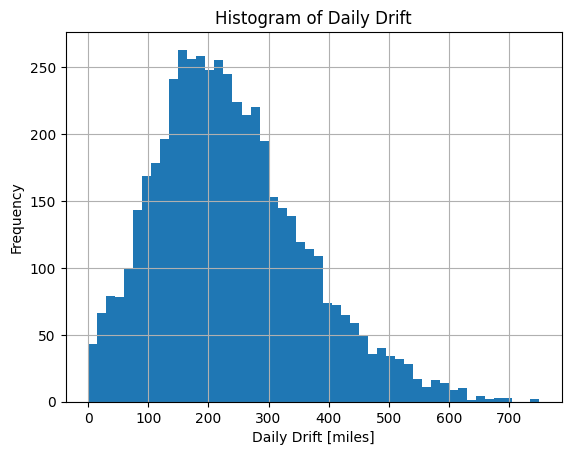

In [237]:
print(last_daily_drift.describe())    # summary statistics of drift distances in miles

last_daily_drift = df_std.groupby('date')['daily_drift [miles]'].last()

plt.hist(last_daily_drift, bins=50, range = (0,750))
plt.xlabel('Daily Drift [miles]')
plt.ylabel('Frequency')
plt.grid()
plt.title('Histogram of Daily Drift')
plt.show()


### Calculate New Latitude/Longitude from Drift Values
Latitude and Longitude
![lat_long.png](lat_long.png)

In [193]:
# WDIR is the reported wind direction (degrees from north, 90 = east)
# -8888 and -9999 are exceptions

R_earth = 6.3781e6  # Average Equatorial Radius of Earth in meters

def drift_coord(lat1, long1, bearing, distance):

    bearing_rad = bearing * np.pi/180         # Convert bearing from degrees to radians
   # lat1_rad = (lat1/10000) * np.pi/180       # Normalize latitude decimal place and convert from degrees to radians
   # long1_rad = (long1/10000) * np.pi/180     # Normalize longtitude decimal place and convert from degrees to radians
    lat1_rad = lat1 * (np.pi/180)
    long1_rad = long1 * (np.pi/180)
    
    ang_dist = distance/R_earth             # Angular Distance d/R

    lat2_rad = np.arcsin(np.sin(lat1_rad) * np.cos(ang_dist) + np.cos(lat1_rad) * np.sin(ang_dist) * np.cos(bearing))
    # New Latitude calculation in radians
    lat2_deg = lat2_rad * 180/np.pi     # Convert back to degrees
   

    long2_rad = long1_rad + np.arctan2((np.sin(bearing) * np.sin(ang_dist) * np.cos(lat1_rad)), (np.cos(ang_dist) - (np.sin(lat1_rad) * np.sin(lat2_rad))))
    # New Longtitude calculation in radians
    long2_deg = long2_rad * 180/np.pi     # Convert back to degrees
   

    return lat2_deg, long2_deg

print(drift_coord(40.8650, -72.8628, 5, 10))

(40.865025481899465, -72.86291390650146)


### Capture When Temp below -42 Fahrenheit, RH above 100%, and pressure altitude below 43,000 feet

In [194]:
#Function for ISSR
def issr(temp_f, rhi, press_alt):
    result = pd.Series('no', index = temp_f.index)
    
    result[(temp_f < -42) & (rhi > 1) & (press_alt < 43000)] = 'yes'
    
    return result

## Adding Conversions to DataFrames

### Filter to 2010-2024

In [195]:
#Filtering dataset to 2010-2024 data to reduce need to add conversions to entire dataset
df_std = df_std[(df_std['year'] >= 2010) & (df_std['year'] <= 2024)]

### Adding Conversions to DataFrame

In [196]:
#Fahrenheit - Applying Pandas Vectorization
warnings.filterwarnings("ignore")
condition = (df_std['temp'] != -9999) & (df_std['temp'] != -8888)
df_std['temp_f'] = df_std['temp']
df_std.loc[condition, 'temp_f'] = df_std.loc[condition, 'temp_f'] /10 * (9/5) + 32

In [197]:
#Kelvins - Applying Pandas Vectorization
warnings.filterwarnings("ignore")
condition2 = (df_std['temp'] != -9999) & (df_std['temp'] != -8888)
df_std['temp_k'] = df_std['temp']
df_std.loc[condition2, 'temp_k'] = df_std.loc[condition2, 'temp_k'] / 10 + 273.15

In [198]:
#Pressure Altitude - Applying Pandas Vectorization
warnings.filterwarnings("ignore")
condition3 = (df_std['press'] != -9999) & (df_std['press'] != -8888)
df_std['press_alt'] = df_std['press'] / 100
df_std.loc[condition3, 'press_alt'] = round(((1 - (df_std.loc[condition3, 'press_alt'] / 1013.25) ** 0.190284) \
                                                * 145366.45), 2)

In [199]:
#Relative Humidity to Ice - References Function
warnings.filterwarnings("ignore")
df_std['rh_ice'] = relative_humidity_to_ice(df_std['temp_k'], df_std['rh'])
df_std['rh_ice'] = df_std['rh_ice'].round(3)

In [200]:
#ISSC - References Function
warnings.filterwarnings("ignore")
df_std['issc'] = issr(df_std['temp_f'], df_std['rh_ice'], df_std['press_alt'])

In [201]:
#DataFrame with new added conversion columns
print(city)
df_std

Upton


,id_,year,month,day,hour,reltime,numlev,p_src,np_src,lat,...,timestamp,time_diff,distance [meters],distance [miles],daily_drift [miles],temp_f,temp_k,press_alt,rh_ice,issc
1800607,#USM00072501,2010,1,1,0,2329,190,ncdc6301,ncdc6301,408650,...,2010-01-01 00:00:00,38100.0,0.0,0.000000,449.240871,32.18,273.25,-75.81,0.890,no
1800608,#USM00072501,2010,1,1,0,2329,190,ncdc6301,ncdc6301,408650,...,2010-01-01 00:00:02,2.0,3.6,0.002237,449.240871,32.00,273.15,-53.46,0.888,no
1800609,#USM00072501,2010,1,1,0,2329,190,ncdc6301,ncdc6301,408650,...,2010-01-01 00:00:12,10.0,36.0,0.022369,449.240871,31.64,272.95,134.03,0.872,no
1800610,#USM00072501,2010,1,1,0,2329,190,ncdc6301,ncdc6301,408650,...,2010-01-01 00:00:25,13.0,63.7,0.039581,449.240871,31.10,272.65,363.64,0.972,no
1800611,#USM00072501,2010,1,1,0,2329,190,ncdc6301,ncdc6301,408650,...,2010-01-01 00:00:41,16.0,67.2,0.041756,449.240871,30.74,272.45,643.75,1.001,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3680829,#USM00072501,2024,2,24,12,1112,133,ncdc-nws,,408650,...,2024-02-24 13:24:45,80.0,1312.0,0.815239,141.636282,-70.42,216.25,81333.90,0.039,no
3680830,#USM00072501,2024,2,24,12,1112,133,ncdc-nws,,408650,...,2024-02-24 13:25:21,36.0,457.2,0.284091,141.636282,-69.16,216.95,81769.24,0.040,no
3680831,#USM00072501,2024,2,24,12,1112,133,ncdc-nws,,408650,...,2024-02-24 13:25:25,4.0,48.8,0.030323,141.636282,-68.98,217.05,81824.56,0.040,no
3680832,#USM00072501,2024,2,24,12,1112,133,ncdc-nws,,408650,...,2024-02-24 13:26:01,36.0,612.0,0.380279,141.636282,-68.44,217.35,82265.14,0.038,no


## Filter Dataset (Data from 2023 AND Pressure Altitude Under 43,000)

In [202]:
#Filter and create new DataFrame. New U.S. DataFrame is all data that is in the year 2023 and 
#pressure altitude is under 4,300 ft.
df_clean = df_std[(df_std['year'] == 2023) & (df_std['press_alt'] <= 43000)]

## Finalized Cleaned Datasets for Analysis

In [203]:
#Final Clean Dataset that can be exported to csv, run basic statistics, and plot EDA. 
print(city)
df_clean

Upton


,id_,year,month,day,hour,reltime,numlev,p_src,np_src,lat,...,timestamp,time_diff,distance [meters],distance [miles],daily_drift [miles],temp_f,temp_k,press_alt,rh_ice,issc
3536356,#USM00072501,2023,1,1,12,1106,144,ncdc-nws,ncdc-gts,408650,...,2023-01-01 12:00:00,86400.0,0.0,0.000000,47.534399,49.28,282.75,204.26,0.961,no
3536357,#USM00072501,2023,1,1,12,1106,144,ncdc-nws,ncdc-gts,408650,...,2023-01-01 12:00:05,5.0,37.0,0.022991,47.534399,50.72,283.55,363.37,0.897,no
3536358,#USM00072501,2023,1,1,12,1106,144,ncdc-nws,ncdc-gts,408650,...,2023-01-01 12:00:15,10.0,106.0,0.065865,47.534399,51.62,284.05,564.00,0.833,no
3536359,#USM00072501,2023,1,1,12,1106,144,ncdc-nws,ncdc-gts,408650,...,2023-01-01 12:00:33,18.0,234.0,0.145401,47.534399,51.80,284.15,863.67,0.781,no
3536360,#USM00072501,2023,1,1,12,1106,144,ncdc-nws,ncdc-gts,408650,...,2023-01-01 12:00:49,16.0,227.2,0.141176,47.534399,51.26,283.85,1131.57,0.738,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3659269,#USM00072501,2023,12,31,12,1108,216,ncdc-nws,ncdc-gts,408650,...,2023-12-31 12:00:00,0.0,0.0,0.000000,44.762462,-9999.00,-9999.00,-99.99,-9999.000,no
3659270,#USM00072501,2023,12,31,12,1108,216,ncdc-nws,ncdc-gts,408650,...,2023-12-31 12:00:00,0.0,0.0,0.000000,44.762462,-9999.00,-9999.00,-99.99,-9999.000,no
3659271,#USM00072501,2023,12,31,12,1108,216,ncdc-nws,ncdc-gts,408650,...,2023-12-31 12:00:00,0.0,0.0,0.000000,44.762462,-9999.00,-9999.00,-99.99,-9999.000,no
3659272,#USM00072501,2023,12,31,12,1108,216,ncdc-nws,ncdc-gts,408650,...,2023-12-31 12:00:00,0.0,0.0,0.000000,44.762462,-9999.00,-9999.00,-99.99,-9999.000,no


### Normalize Latitude and Longitude columns

In [204]:
df_clean['lat'] = df_clean['lat'] / 10000.0
df_clean['lon'] = df_clean['lon'] / 10000.0

### Apply Drift_Coord Function

In [205]:
df_clean['new_lat'] = df_clean['lat'].astype(float)
df_clean['new_long'] = df_clean['lon'].astype(float)

df_clean.sort_values(by=['year', 'month', 'day', 'hour'], inplace=True)


temp_df = df_clean.copy()

# Iterate through each group and update 'new_lat' and 'new_long' where applicable
for (year, month, day, hour), group in temp_df.groupby(['year', 'month', 'day', 'hour']):
    # Skip the first row of each group as it's already initialized
    for i in range(1, len(group)):
        # Access the index of the current and previous row
        curr_index = group.index[i]
        prev_index = group.index[i - 1]
        
        # Use 'drift_coord' with the previous row's 'new_lat' and 'new_long' to update the current row
        new_lat, new_long = drift_coord(temp_df.at[prev_index, 'new_lat'], temp_df.at[prev_index, 'new_long'],
                                        temp_df.at[curr_index, 'wdir'], temp_df.at[curr_index, 'distance [meters]'])
        
        # Update 'new_lat' and 'new_long' in the original DataFrame
        df_clean.at[curr_index, 'new_lat'] = new_lat
        df_clean.at[curr_index, 'new_long'] = new_long


In [206]:
df_clean

,id_,year,month,day,hour,reltime,numlev,p_src,np_src,lat,...,distance [meters],distance [miles],daily_drift [miles],temp_f,temp_k,press_alt,rh_ice,issc,new_lat,new_long
3536356,#USM00072501,2023,1,1,12,1106,144,ncdc-nws,ncdc-gts,40.865,...,0.0,0.000000,47.534399,49.28,282.75,204.26,0.961,no,40.865000,-72.862800
3536357,#USM00072501,2023,1,1,12,1106,144,ncdc-nws,ncdc-gts,40.865,...,37.0,0.022991,47.534399,50.72,283.55,363.37,0.897,no,40.864726,-72.862551
3536358,#USM00072501,2023,1,1,12,1106,144,ncdc-nws,ncdc-gts,40.865,...,106.0,0.065865,47.534399,51.62,284.05,564.00,0.833,no,40.864096,-72.862406
3536359,#USM00072501,2023,1,1,12,1106,144,ncdc-nws,ncdc-gts,40.865,...,234.0,0.145401,47.534399,51.80,284.15,863.67,0.781,no,40.867033,-72.862094
3536360,#USM00072501,2023,1,1,12,1106,144,ncdc-nws,ncdc-gts,40.865,...,227.2,0.141176,47.534399,51.26,283.85,1131.57,0.738,no,40.867040,-72.862872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3659269,#USM00072501,2023,12,31,12,1108,216,ncdc-nws,ncdc-gts,40.865,...,0.0,0.000000,44.762462,-9999.00,-9999.00,-99.99,-9999.000,no,40.865000,-72.862800
3659270,#USM00072501,2023,12,31,12,1108,216,ncdc-nws,ncdc-gts,40.865,...,0.0,0.000000,44.762462,-9999.00,-9999.00,-99.99,-9999.000,no,40.865000,-72.862800
3659271,#USM00072501,2023,12,31,12,1108,216,ncdc-nws,ncdc-gts,40.865,...,0.0,0.000000,44.762462,-9999.00,-9999.00,-99.99,-9999.000,no,40.865000,-72.862800
3659272,#USM00072501,2023,12,31,12,1108,216,ncdc-nws,ncdc-gts,40.865,...,0.0,0.000000,44.762462,-9999.00,-9999.00,-99.99,-9999.000,no,40.865000,-72.862800


## Basic Statistics for Dataset

In [207]:
#Calculating number of rows with null values
num_rows = len(df_clean)
null_rows = ((df_clean['rh_ice'].isin([-9999, -8888])) |
                                  (df_clean['temp'].isin([-9999, -8888])) |
                                  (df_clean['press'].isin([-9999, -8888]))).sum()
null_rows_percent = (null_rows / len(df_clean)) * 100
issr_count = len(df_clean[df_clean['issc'] == 'yes'])

#Number of null rows means that if a row had -8888 or -9999 values for rh_ice, temp, or pressure
print(f"Dataset Statistics for {city}:")
print("")
print("Number of rows in 2023 data:", num_rows)
print("Number of null rows: ", null_rows)
print("Percent of null rows: ", round(null_rows_percent, 2), "%")
print("Number of rows that meet ISS conditions: ", issr_count)

Dataset Statistics for Upton:

Number of rows in 2023 data: 69130
Number of null rows:  30775
Percent of null rows:  44.52 %
Number of rows that meet ISS conditions:  110


## ISS Conditions Exploratory Data Analysis

### Number of occurrences of ISSC

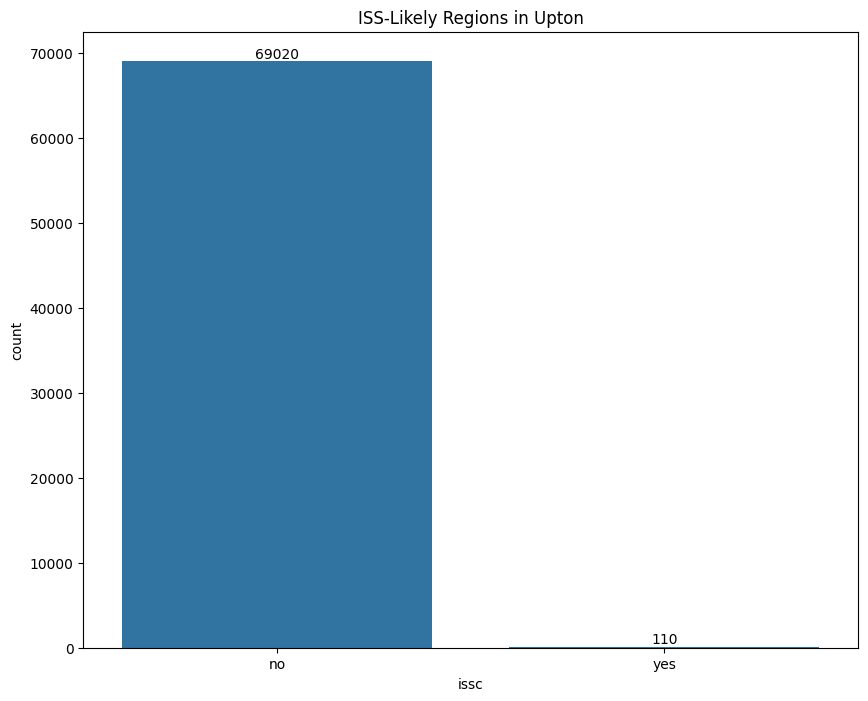

In [208]:
#This plot shows the amount of times in our dataframe that ISSC was annotated as yes
plt.figure(figsize = (10, 8))

ax = sns.countplot(x = 'issc', data = df_clean)
ax.set(title = f'ISS-Likely Regions in {city}')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(),
           f'{int(p.get_height())}', ha = 'center', va = 'bottom')

#plt.savefig(f'{city}_issr_percent.png')

### ISS Conditions were present in the region X% days

In [209]:
#This cell outputs a percentage of days ISSC occurred. 
issc_days_df = df_clean[df_clean['issc'] == 'yes']

# Drop duplicates based on date. This is so it only counts issc once per each day of occurrence.
unique_dates_df = issc_days_df.drop_duplicates(subset=['date'])

print(f"Number of days ISSC were present is in {city}:", unique_dates_df['issc'].count())
print(f"Percent of days ISSC were present in {city}:", round(unique_dates_df['issc'].count() / 365, 2) * 100, "%")


Number of days ISSC were present is in Upton: 23
Percent of days ISSC were present in Upton: 6.0 %


### ISS Conditions were present in the region X% of days a month

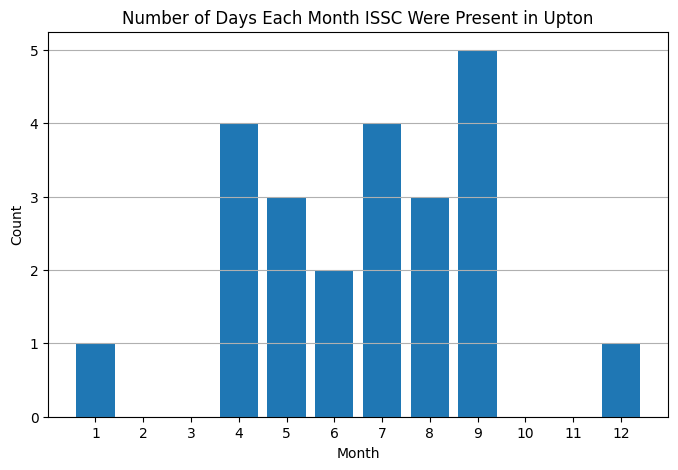

In [210]:
# This plots the amount of days per month ISSC occurred. 
plt.figure(figsize=(8, 5))
plt.hist(unique_dates_df['month'], bins=range(1, 14), align='left', rwidth=0.8)
plt.xticks(range(1, 13))
plt.xlabel('Month')
plt.ylabel('Count')
plt.title(f'Number of Days Each Month ISSC Were Present in {city}')
plt.grid(axis='y')
plt.show()

### ISS Conditions were most prevalent during the XXX 12 hour window (midnight to noon, noon-midnight)

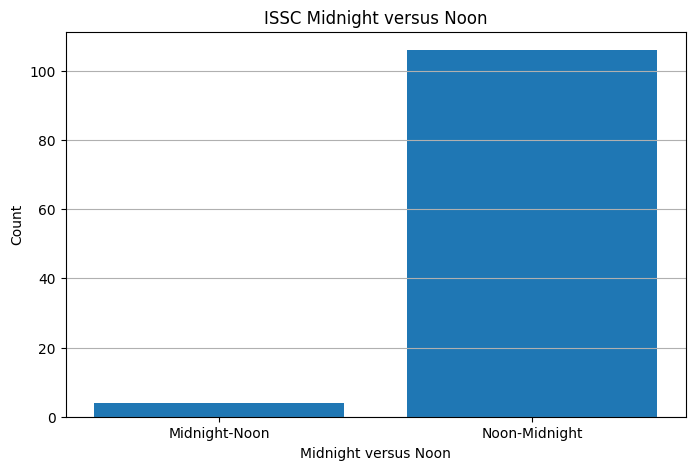

In [211]:
#This plots the amount of times ISSC occurred between midnight to noon and noon to midnight
count_less_than_12 = issc_days_df[issc_days_df['hour'] < 12]['hour'].count()
count_12_and_up = issc_days_df[issc_days_df['hour'] >= 12]['hour'].count()

# Plot bar plot for counts
plt.figure(figsize=(8, 5))
plt.bar(['Midnight-Noon', 'Noon-Midnight'], [count_less_than_12, count_12_and_up])
plt.xlabel('Midnight versus Noon')
plt.ylabel('Count')
plt.title('ISSC Midnight versus Noon')
plt.grid(axis='y')
plt.show()

## Press_Alt vs RHI & Fahrenheit Visual 

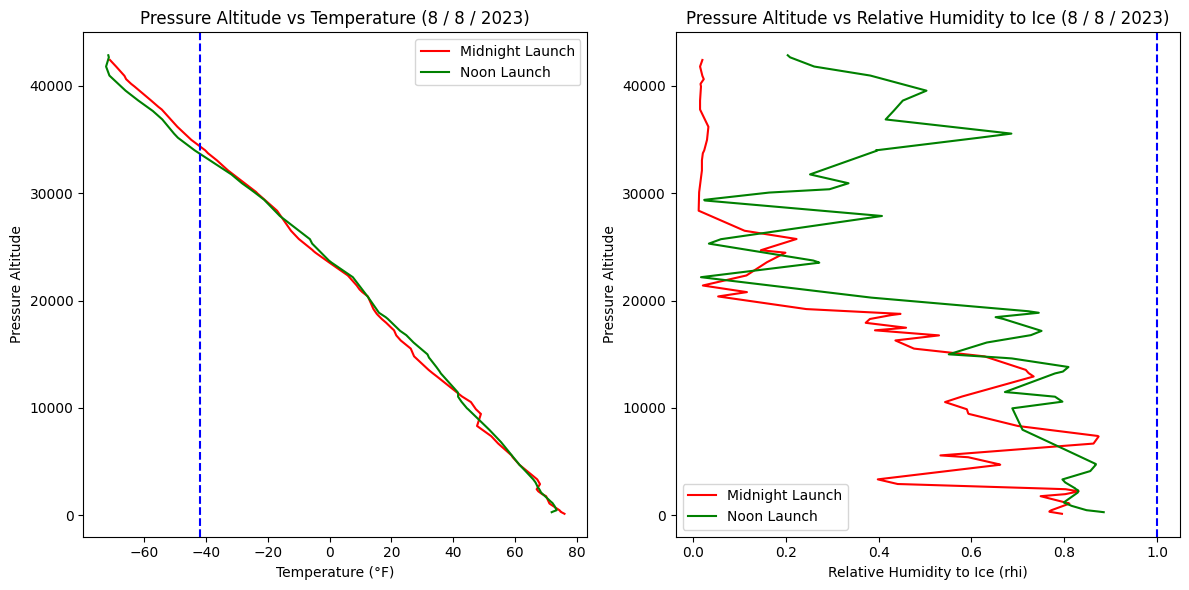

In [212]:
# This visual is created using a specific date 

# Filter data for specific date and remove rows with -9999 / -8888 in the 'rh_ice' column
visual_df = df_clean[(df_clean['month'] == 8) & (df_clean['day'] == 8) & (df_clean['rh_ice'] > 0)]

# Create figure and axes objects
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Split the data based on 'hour' (0 for midnight, 12 for noon)
midnight_launch = visual_df[visual_df['hour'] == 0]
noon_launch = visual_df[visual_df['hour'] == 12]

axs[0].plot(midnight_launch['temp_f'], midnight_launch['press_alt'], 'r-', label='Midnight Launch')
axs[0].plot(noon_launch['temp_f'], noon_launch['press_alt'], 'g-', label='Noon Launch')

axs[1].plot(midnight_launch['rh_ice'], midnight_launch['press_alt'], 'r-', label='Midnight Launch')
axs[1].plot(noon_launch['rh_ice'], noon_launch['press_alt'], 'g-', label='Noon Launch')

# Find the critical points where both temp_f is less than -42 and rh_ice is greater than 1
critical_midnight = midnight_launch[(midnight_launch['temp_f'] < -42) & (midnight_launch['rh_ice'] > 1)]
critical_noon = noon_launch[(noon_launch['temp_f'] < -42) & (noon_launch['rh_ice'] > 1)]

# Plotting the critical points with red dots on both axes
for dataset, label in zip([critical_midnight, critical_noon], ['Midnight', 'Noon']):
    if not dataset.empty:
        critical_point = dataset.iloc[0]

        # Plot the red dot on the left graph (Temperature vs Pressure Altitude)
        axs[0].plot(critical_point['temp_f'], critical_point['press_alt'], 'ro', label= 'ISSC')

        # Plot the red dot on the right graph (Relative Humidity to Ice vs Pressure Altitude)
        axs[1].plot(critical_point['rh_ice'], critical_point['press_alt'], 'ro', label = 'ISSC')

# labels, legends, and titles for the left axes (Temperature vs Pressure Altitude)
axs[0].set_xlabel('Temperature (°F)')
axs[0].set_ylabel('Pressure Altitude')
axs[0].axvline(x=-42, color='blue', linestyle='--')
axs[0].legend()

# labels, legends, and titles for the right axes (Relative Humidity to Ice vs Pressure Altitude)
axs[1].set_xlabel('Relative Humidity to Ice (rhi)')
axs[1].set_ylabel('Pressure Altitude')
axs[1].axvline(x=1, color='blue', linestyle='--')
axs[1].legend()

# Titles 
axs[0].set_title('Pressure Altitude vs Temperature (8 / 8 / 2023)')
axs[1].set_title('Pressure Altitude vs Relative Humidity to Ice (8 / 8 / 2023)')

plt.tight_layout()
plt.show()


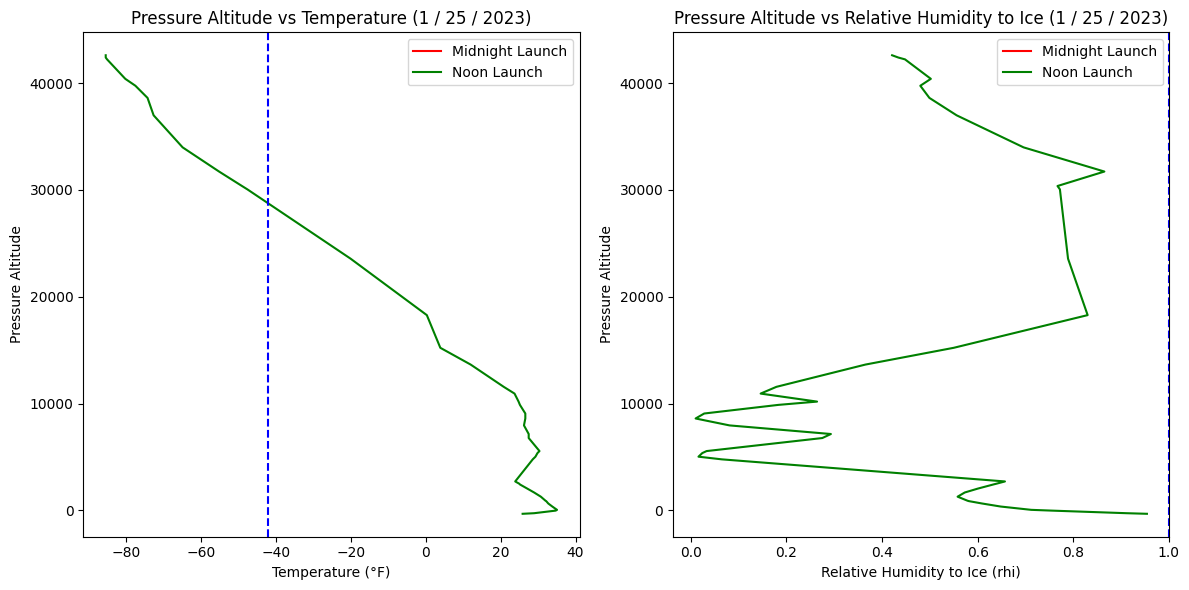

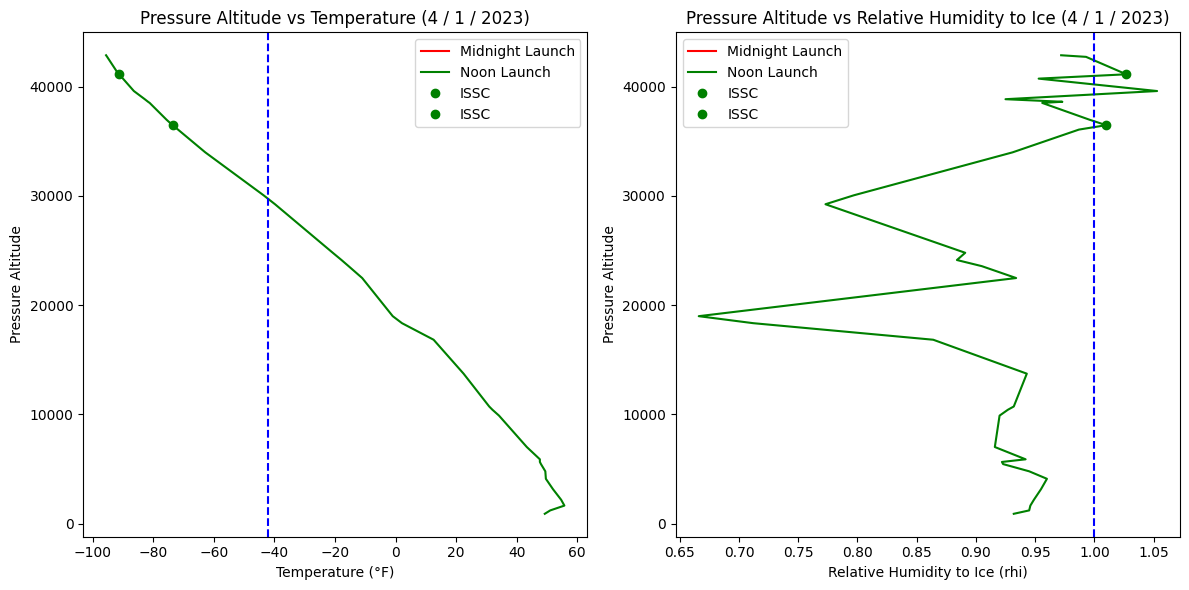

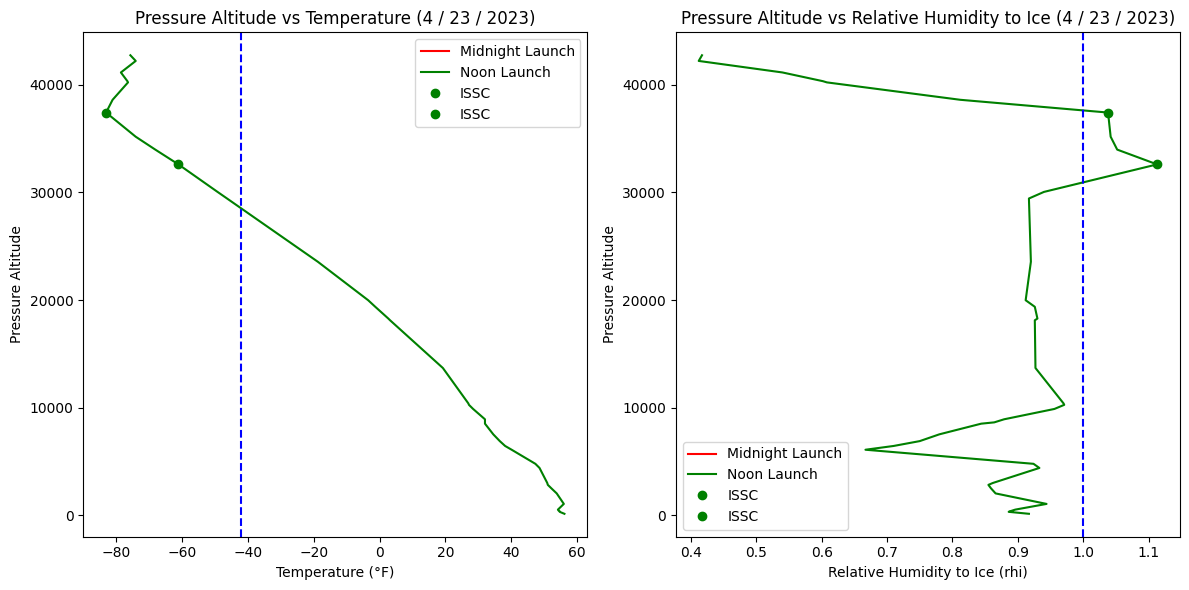

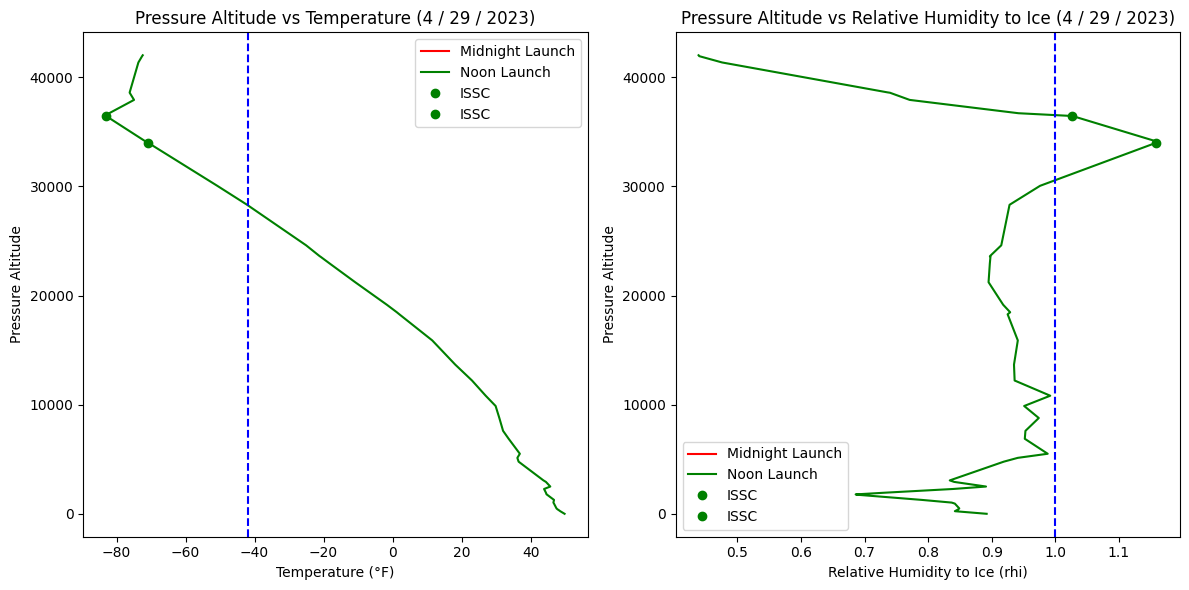

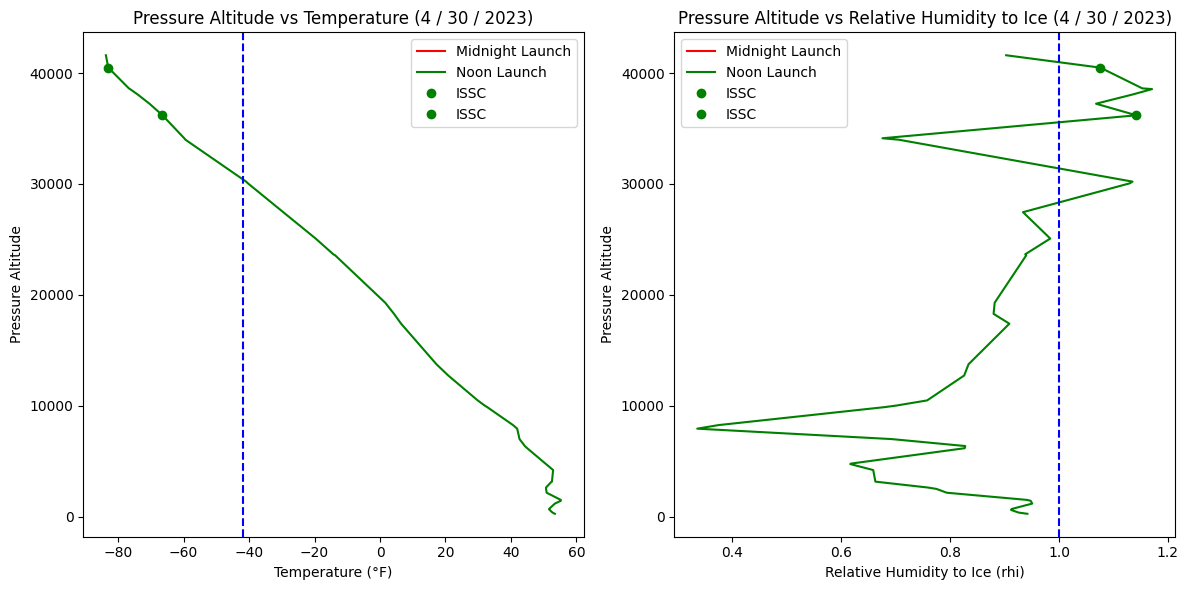

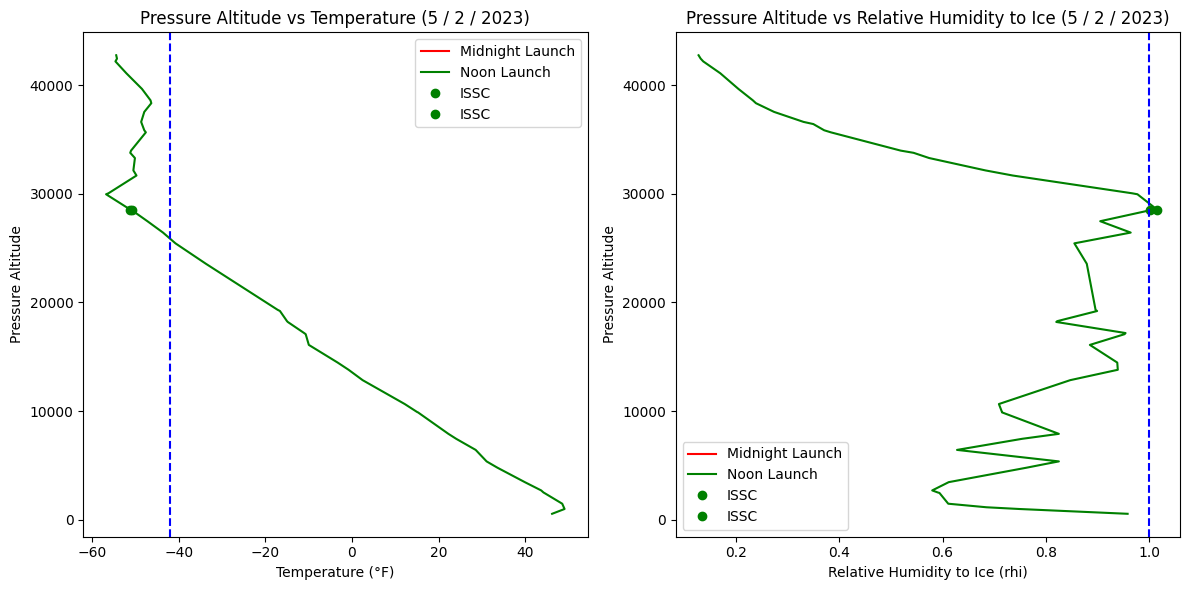

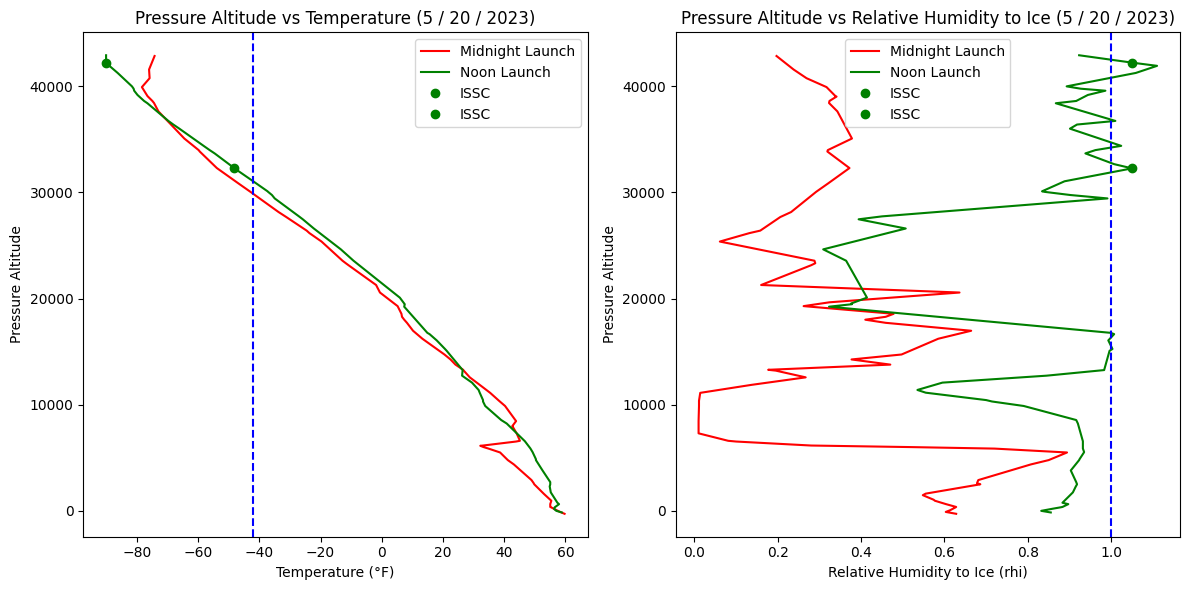

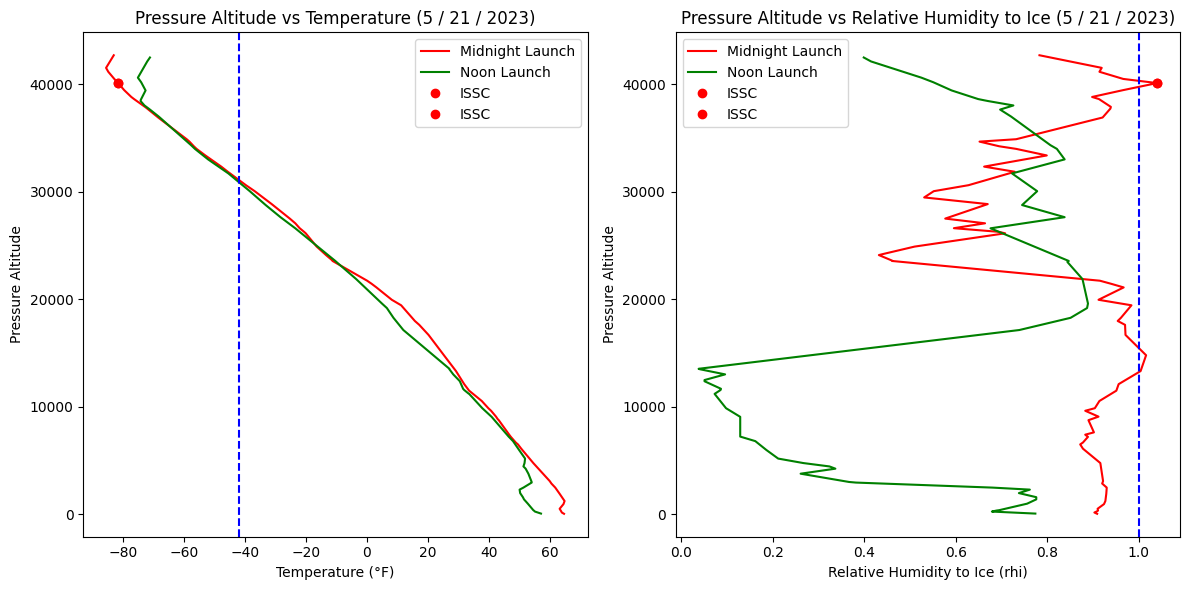

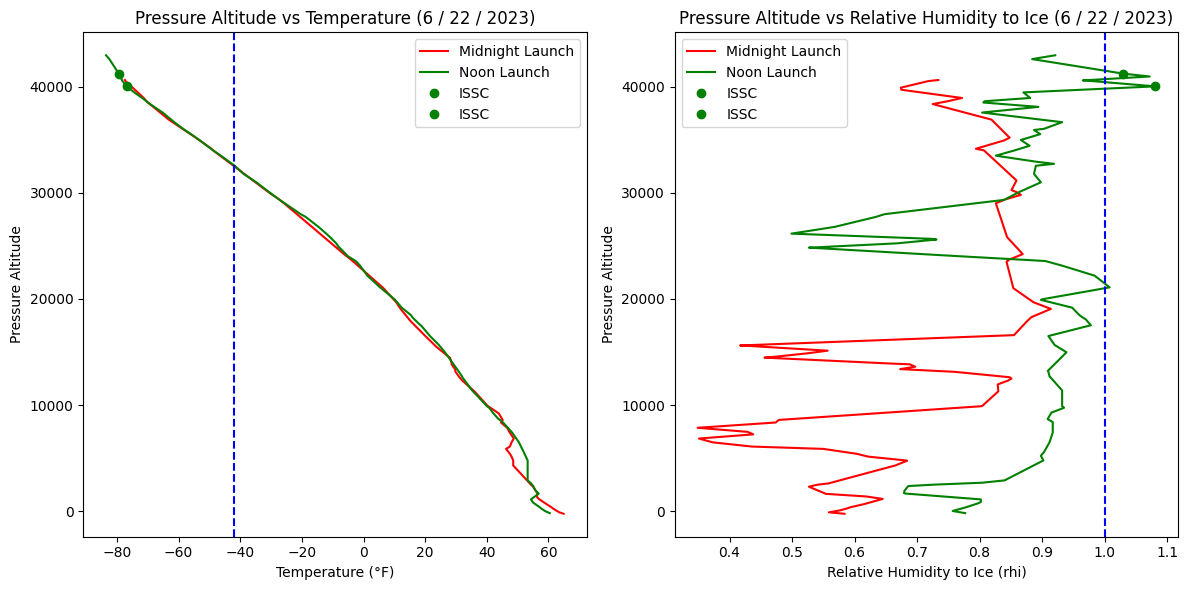

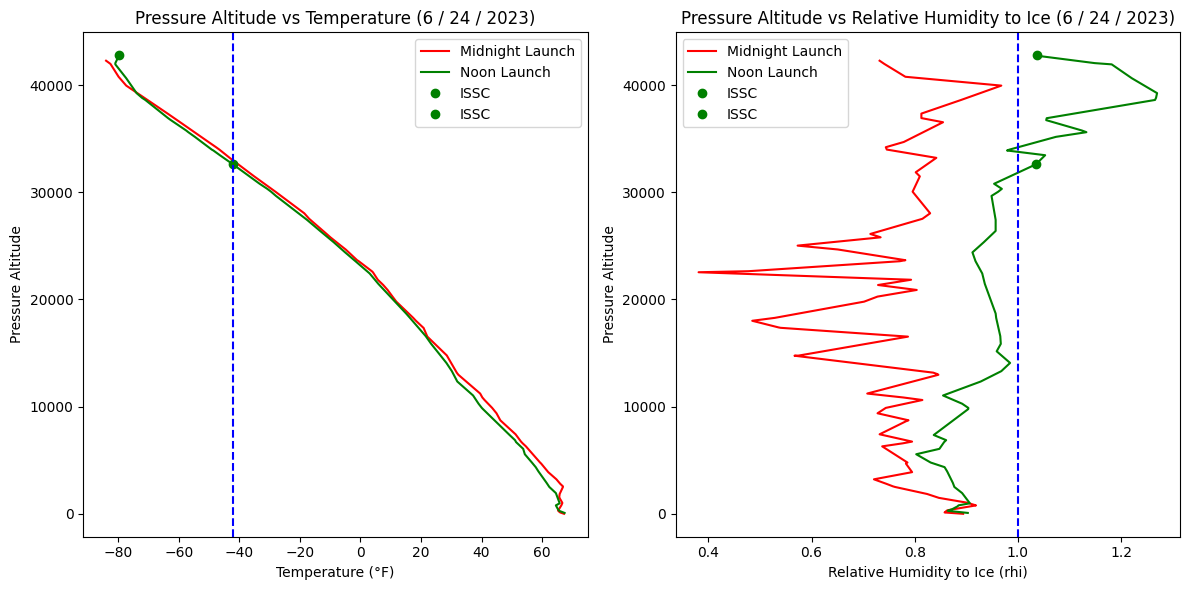

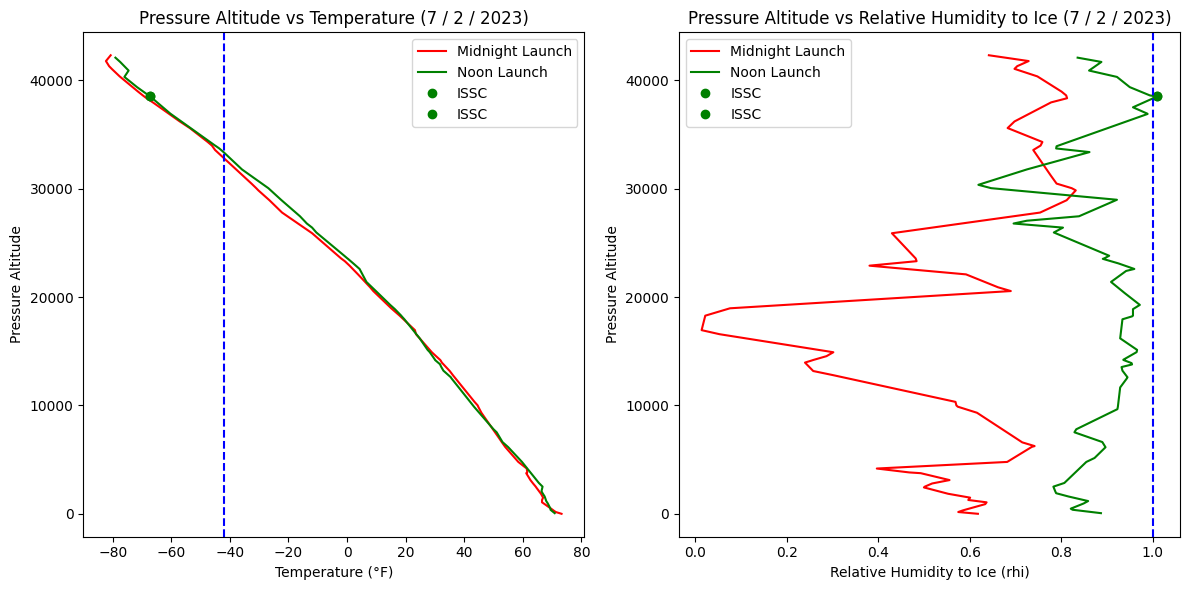

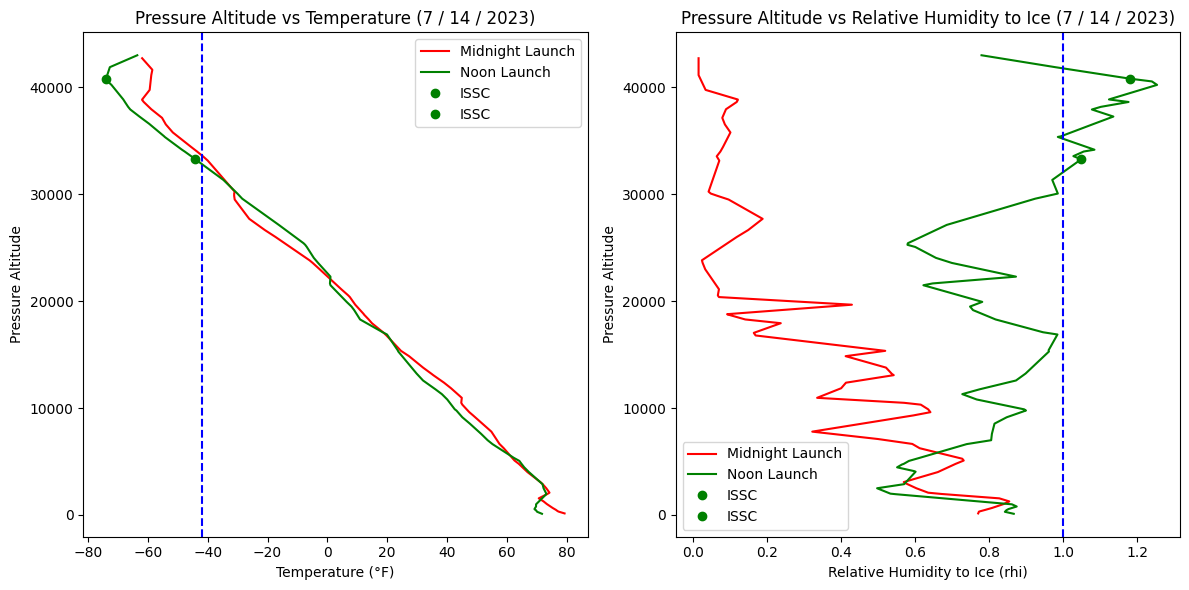

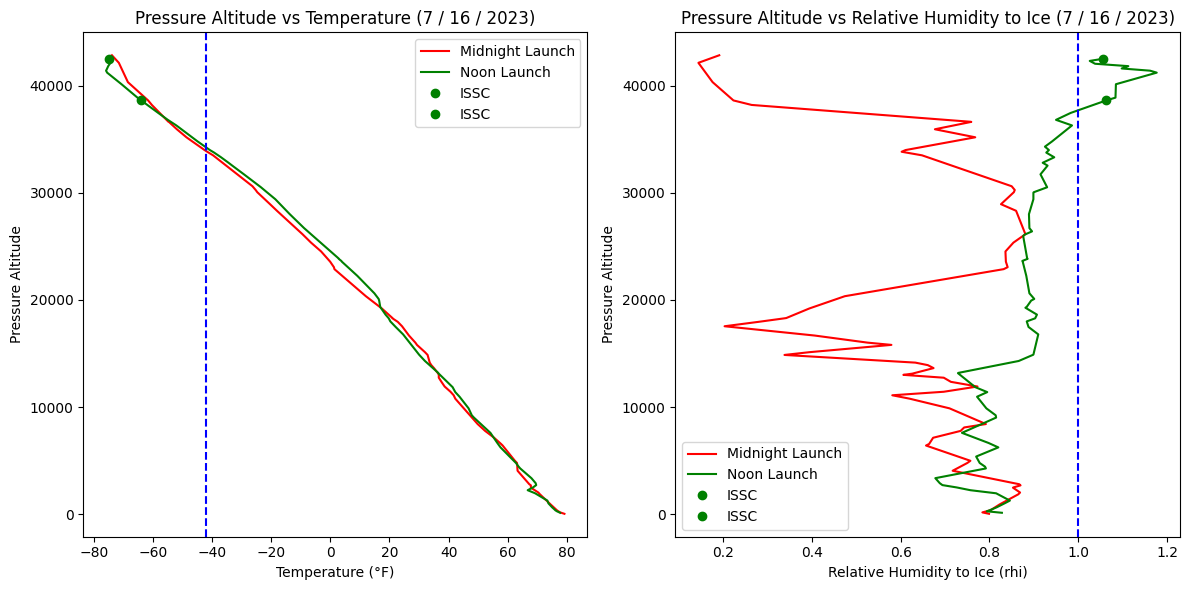

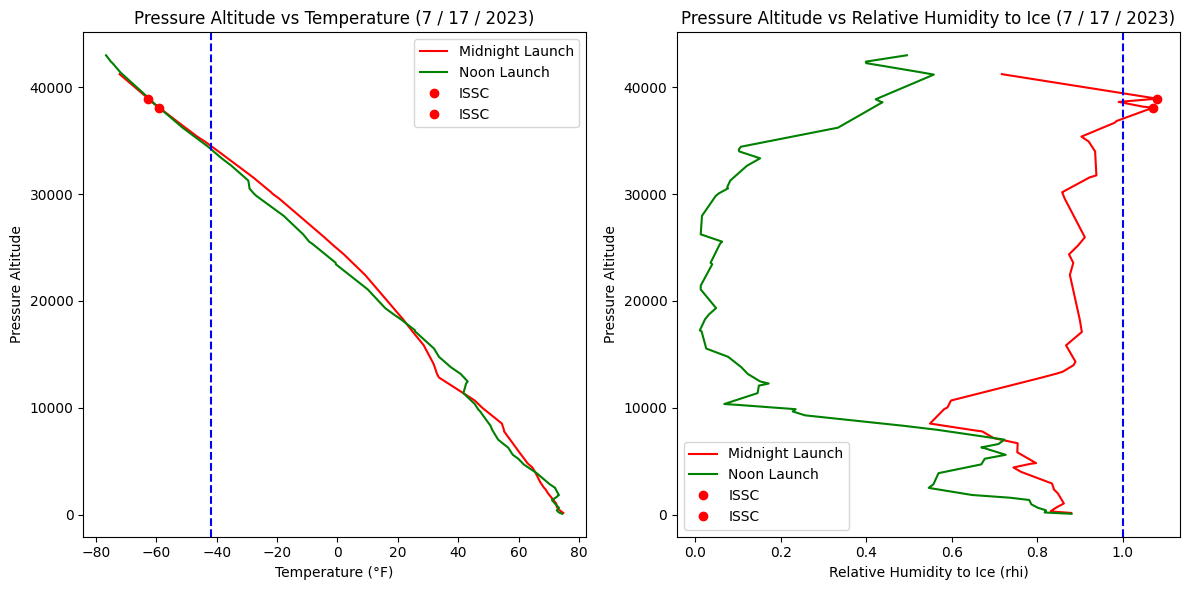

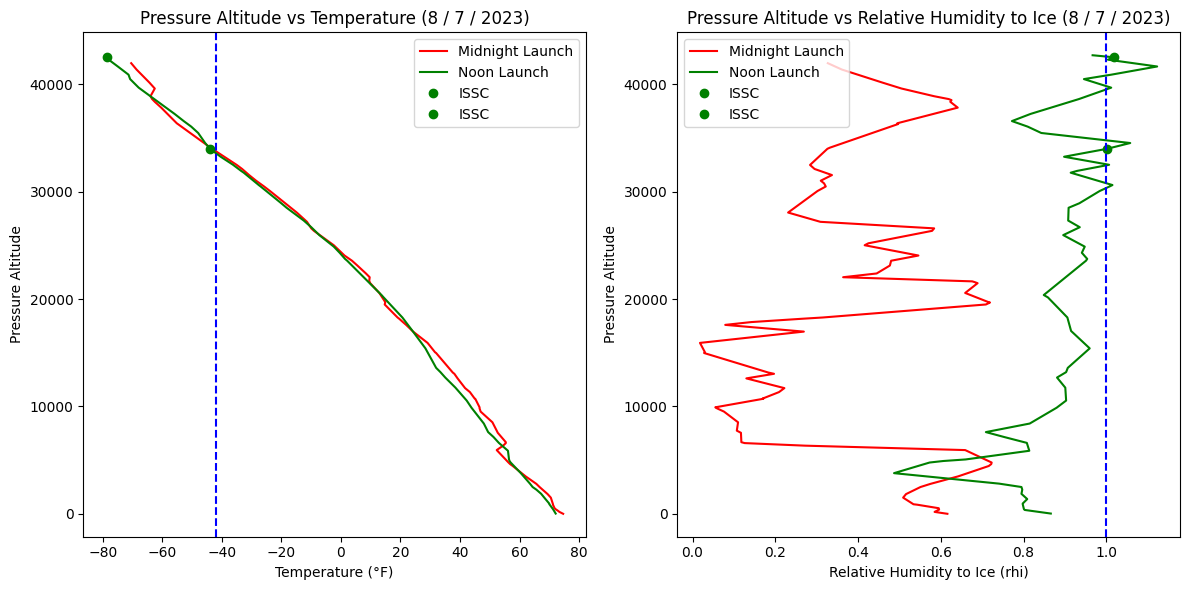

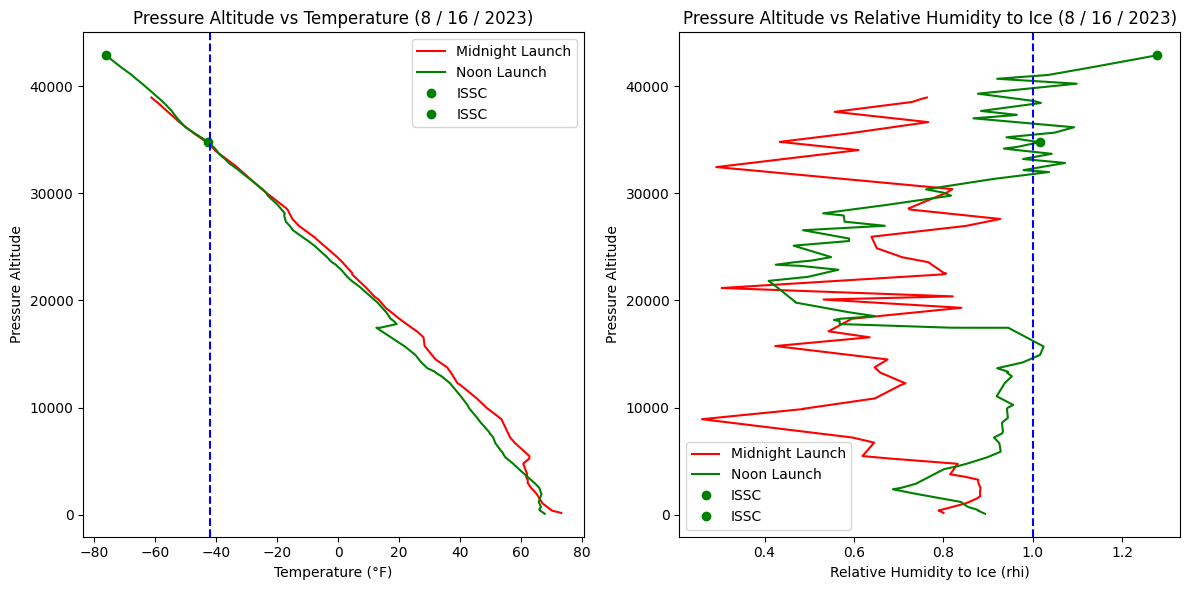

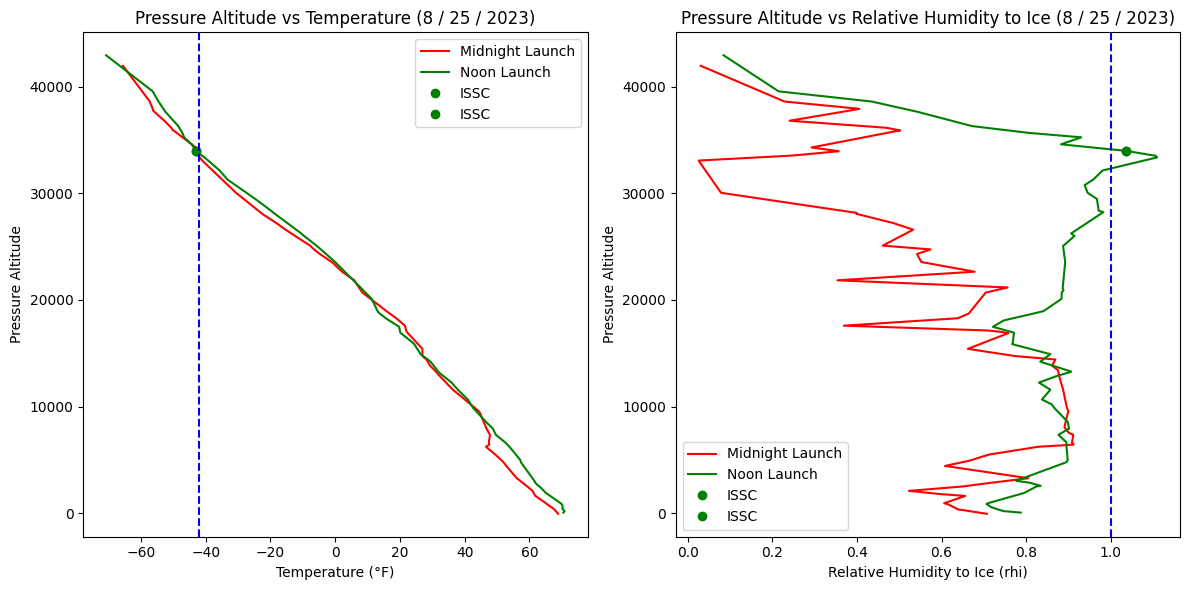

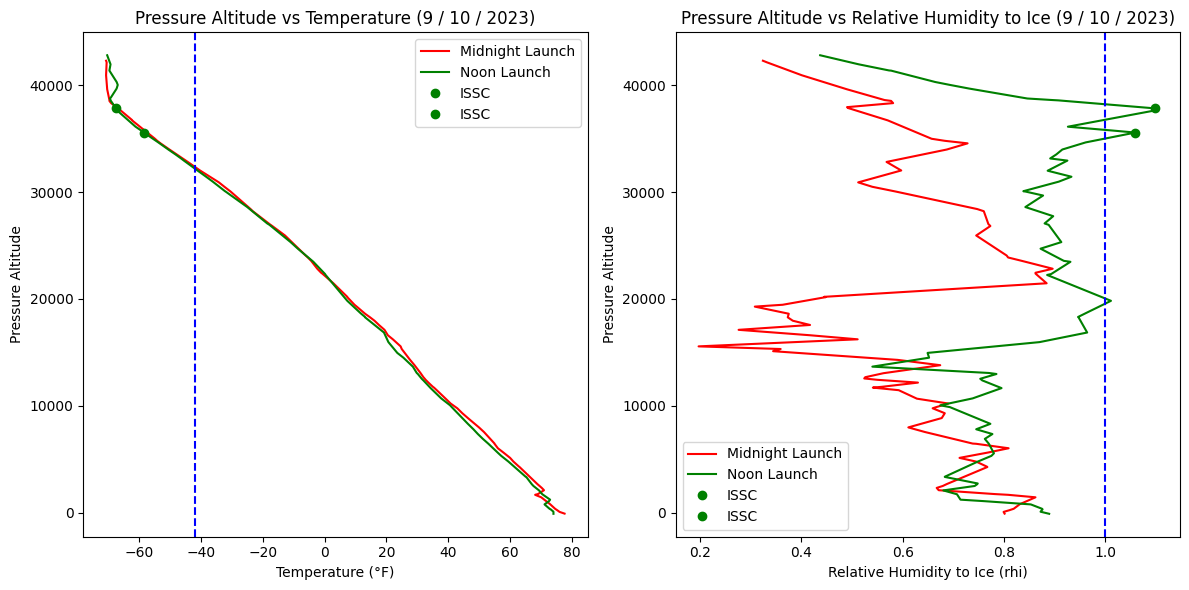

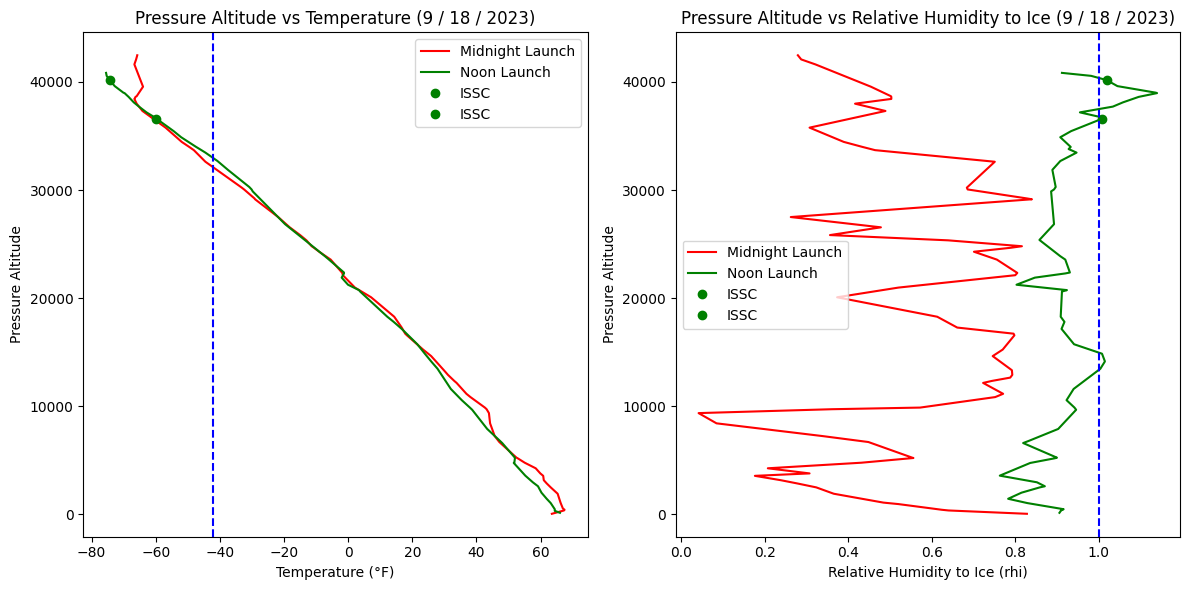

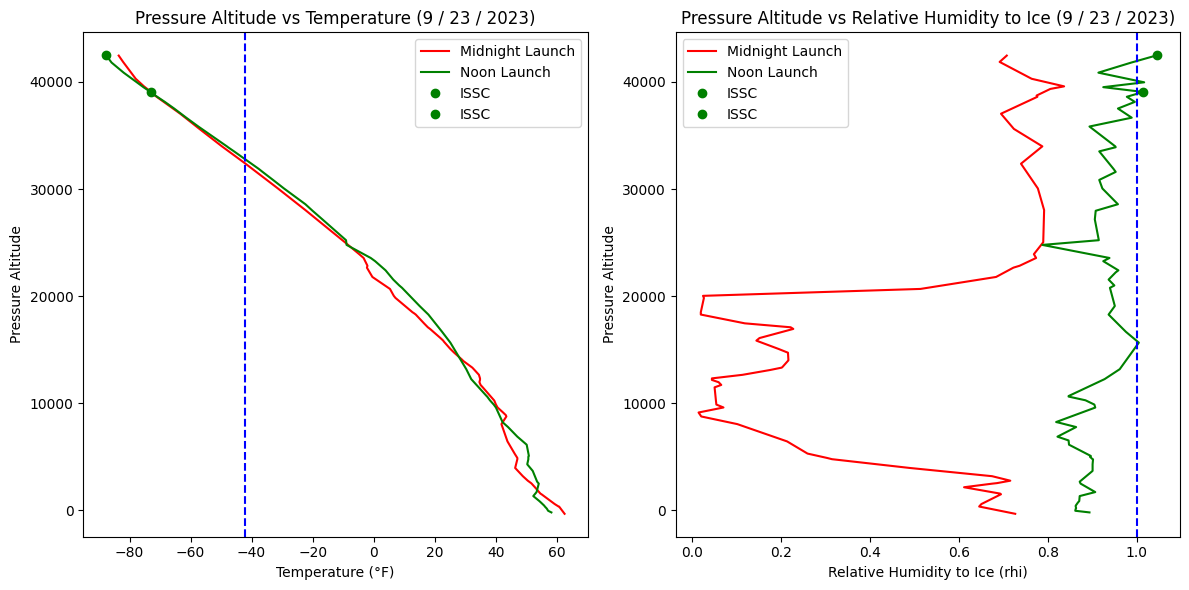

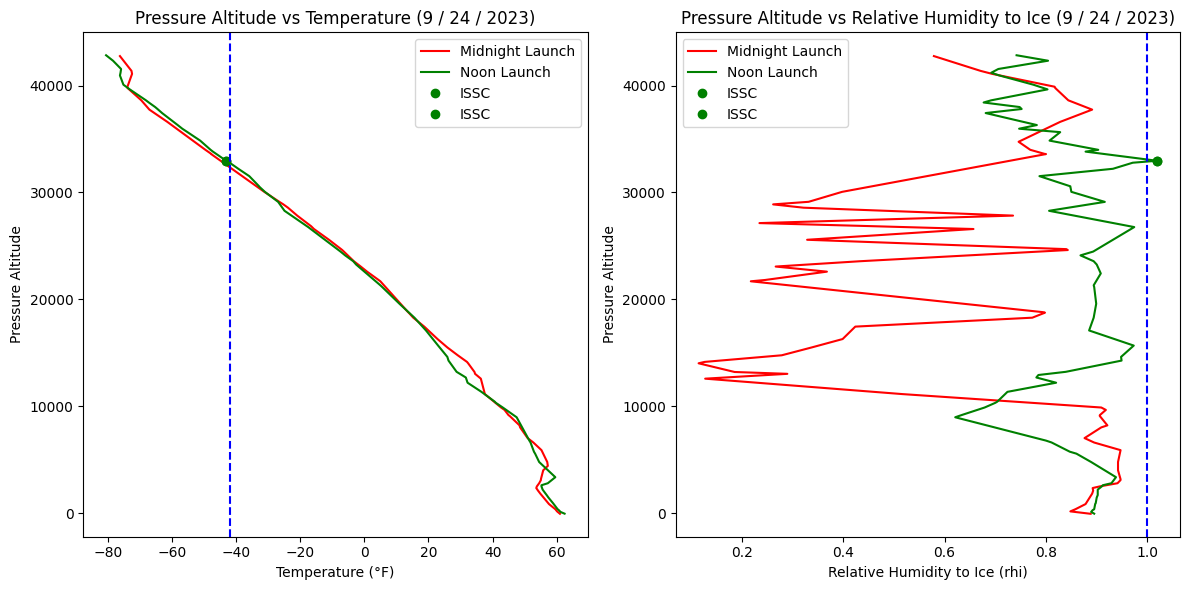

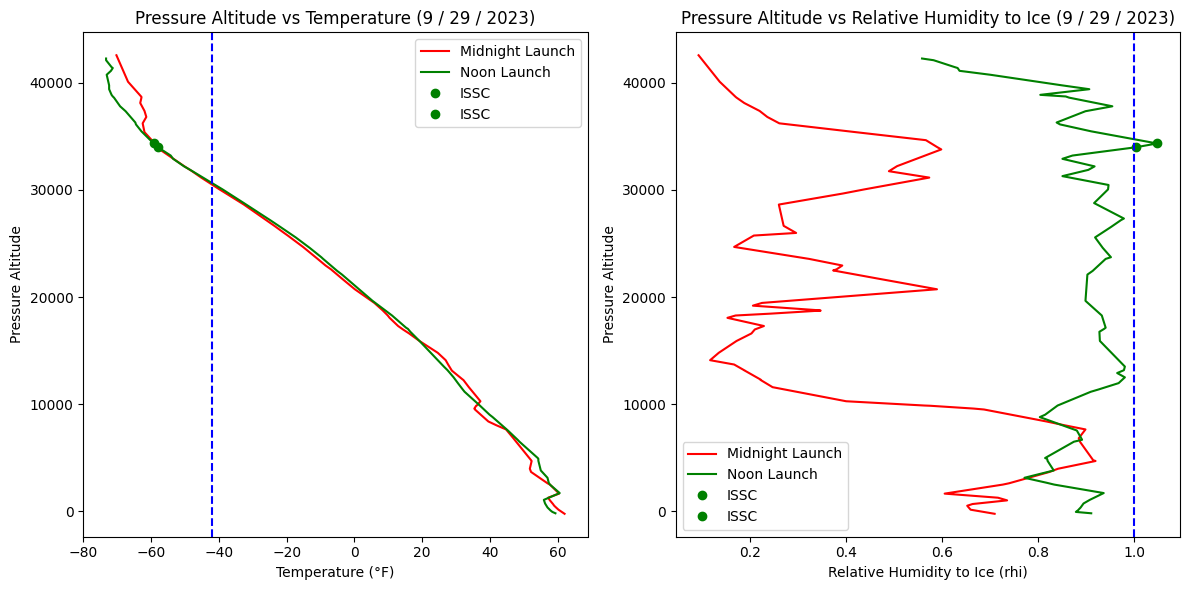

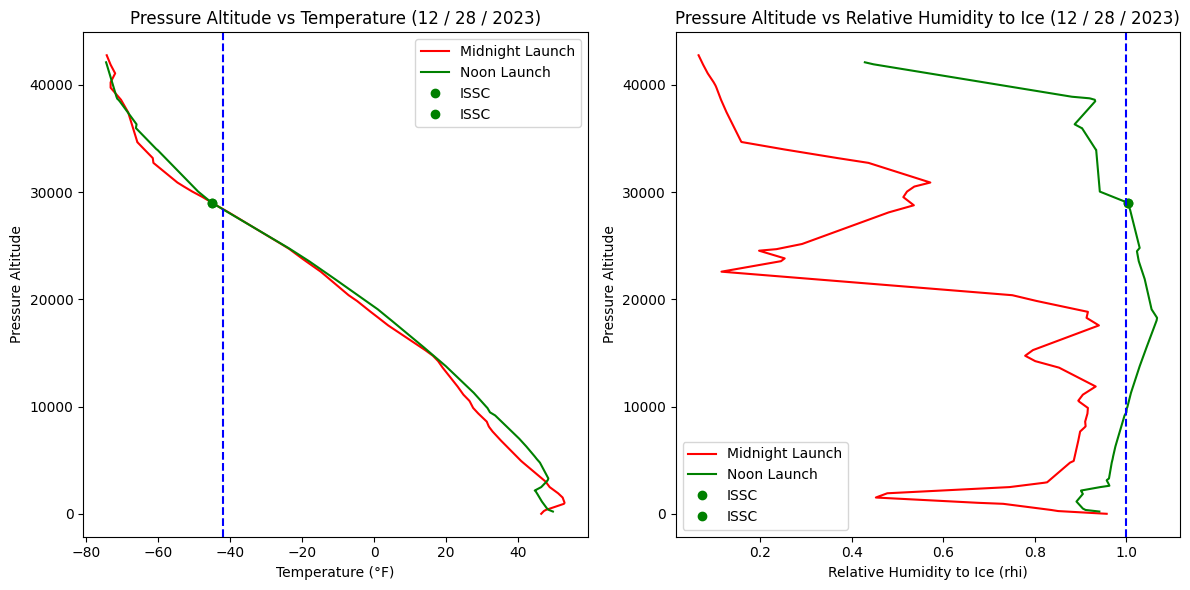

In [213]:
# This cell creates the above visual for each day that has at least one issc = 'yes'

# Group by 'month' and 'day' and filter groups that have 'yes' in 'issc' column
grouped = df_clean.groupby(['month', 'day'])
days_to_plot = [name for name, group in grouped if (group['issc'] == 'yes').any()]

# loop through the filtered days and plot the visuals
for (month, day) in days_to_plot:
    visual_df_2 = df_clean[(df_clean['month'] == month) & (df_clean['day'] == day) & (df_clean['rh_ice'] > 0)]
    
    # Check if there is any data to plot for this day
    if not visual_df_2.empty:
        # Create figure and axes objects
        fig, axs = plt.subplots(1, 2, figsize=(12, 6))
        
        # Split the data based on 'hour' (0 for midnight, 12 for noon)
        midnight_launch = visual_df_2[visual_df_2['hour'] == 0]
        noon_launch = visual_df_2[visual_df_2['hour'] == 12]
        
        axs[0].plot(midnight_launch['temp_f'], midnight_launch['press_alt'], 'r-', label='Midnight Launch')
        axs[0].plot(noon_launch['temp_f'], noon_launch['press_alt'], 'g-', label='Noon Launch')
        
        axs[1].plot(midnight_launch['rh_ice'], midnight_launch['press_alt'], 'r-', label='Midnight Launch')
        axs[1].plot(noon_launch['rh_ice'], noon_launch['press_alt'], 'g-', label='Noon Launch')
        
        # Find the critical points where both temp_f is less than -42 and rh_ice is greater than 1
        critical_midnight = midnight_launch[(midnight_launch['temp_f'] < -42) & (midnight_launch['rh_ice'] > 1)]
        critical_noon = noon_launch[(noon_launch['temp_f'] < -42) & (noon_launch['rh_ice'] > 1)]
        
        # Select the first and last critical points for Midnight
        if not critical_midnight.empty:
            critical_points_midnight = critical_midnight.iloc[[0, -1]]
        else:
            critical_points_midnight = critical_midnight
    
        # Select the first and last critical points for Noon
        if not critical_noon.empty:
            critical_points_noon = critical_noon.iloc[[0, -1]]
        else:
            critical_points_noon = critical_noon
        
        # Plotting the critical pointson both axes
        for critical_points, color in zip([critical_points_midnight, critical_points_noon], ['r', 'g']):
            for index, critical_point in critical_points.iterrows():
            # Plot on the left graph 
                axs[0].plot(critical_point['temp_f'], critical_point['press_alt'], color + 'o', label='ISSC')
            
            # Plot on the right graph 
                axs[1].plot(critical_point['rh_ice'], critical_point['press_alt'], color + 'o', label='ISSC')
        
        # Set labels, legends, and titles
        axs[0].set_xlabel('Temperature (°F)')
        axs[0].set_ylabel('Pressure Altitude')
        axs[0].axvline(x=-42, color='blue', linestyle='--')
        axs[0].legend()
        
        axs[1].set_xlabel('Relative Humidity to Ice (rhi)')
        axs[1].set_ylabel('Pressure Altitude')
        axs[1].axvline(x=1, color='blue', linestyle='--')
        axs[1].legend()
        
        # Titles with the current day
        axs[0].set_title(f'Pressure Altitude vs Temperature ({month} / {day} / 2023)')
        axs[1].set_title(f'Pressure Altitude vs Relative Humidity to Ice ({month} / {day} / 2023)')
        
        plt.tight_layout()
        plt.show()


## Adding Floor and Ceiling Binary Attributes 

In [214]:
df_clean.reset_index(inplace = True, drop = True)
df_clean

,id_,year,month,day,hour,reltime,numlev,p_src,np_src,lat,...,distance [meters],distance [miles],daily_drift [miles],temp_f,temp_k,press_alt,rh_ice,issc,new_lat,new_long
0,#USM00072501,2023,1,1,12,1106,144,ncdc-nws,ncdc-gts,40.865,...,0.0,0.000000,47.534399,49.28,282.75,204.26,0.961,no,40.865000,-72.862800
1,#USM00072501,2023,1,1,12,1106,144,ncdc-nws,ncdc-gts,40.865,...,37.0,0.022991,47.534399,50.72,283.55,363.37,0.897,no,40.864726,-72.862551
2,#USM00072501,2023,1,1,12,1106,144,ncdc-nws,ncdc-gts,40.865,...,106.0,0.065865,47.534399,51.62,284.05,564.00,0.833,no,40.864096,-72.862406
3,#USM00072501,2023,1,1,12,1106,144,ncdc-nws,ncdc-gts,40.865,...,234.0,0.145401,47.534399,51.80,284.15,863.67,0.781,no,40.867033,-72.862094
4,#USM00072501,2023,1,1,12,1106,144,ncdc-nws,ncdc-gts,40.865,...,227.2,0.141176,47.534399,51.26,283.85,1131.57,0.738,no,40.867040,-72.862872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69125,#USM00072501,2023,12,31,12,1108,216,ncdc-nws,ncdc-gts,40.865,...,0.0,0.000000,44.762462,-9999.00,-9999.00,-99.99,-9999.000,no,40.865000,-72.862800
69126,#USM00072501,2023,12,31,12,1108,216,ncdc-nws,ncdc-gts,40.865,...,0.0,0.000000,44.762462,-9999.00,-9999.00,-99.99,-9999.000,no,40.865000,-72.862800
69127,#USM00072501,2023,12,31,12,1108,216,ncdc-nws,ncdc-gts,40.865,...,0.0,0.000000,44.762462,-9999.00,-9999.00,-99.99,-9999.000,no,40.865000,-72.862800
69128,#USM00072501,2023,12,31,12,1108,216,ncdc-nws,ncdc-gts,40.865,...,0.0,0.000000,44.762462,-9999.00,-9999.00,-99.99,-9999.000,no,40.865000,-72.862800


In [215]:
# Add 'floor' and 'ceiling' columns to the DataFrame with default values of 0.
df_clean['floor'] = 0
df_clean['ceiling'] = 0

# Identify the first and last 'yes' entries in the 'issc' column for each day.

def identify_floor_ceiling(group):
    # Identify the index of the first and last 'yes' in 'issc' for each group
    issc_yes_indices = group.index[group['issc'] == 'yes'].tolist()
    if issc_yes_indices:
        altitude_value = group.loc[issc_yes_indices[0], 'press_alt']
        altitude_value2 = group.loc[issc_yes_indices[-1], 'press_alt']
        
        # If there's only one 'yes' entry, mark it as both floor and ceiling
        if len(issc_yes_indices) == 1:
            group.loc[issc_yes_indices[0], 'floor'] = altitude_value
            group.loc[issc_yes_indices[0], 'ceiling'] = altitude_value
        else:
            # Mark the first and last 'yes' entries appropriately
            group.loc[issc_yes_indices[0], 'floor'] = altitude_value
            group.loc[issc_yes_indices[-1], 'ceiling'] = altitude_value2
    return group

# Applying the function to each group
df_clean = df_clean.groupby(['month', 'day', 'hour'], as_index = False).apply(identify_floor_ceiling)

df_clean.reset_index(inplace = True)

df_clean[df_clean['issc'] == 'yes']

,level_0,level_1,id_,year,month,day,hour,reltime,numlev,p_src,...,daily_drift [miles],temp_f,temp_k,press_alt,rh_ice,issc,new_lat,new_long,floor,ceiling
2388,26,2388,#USM00072501,2023,1,25,21,2034,86,ncdc-nws,...,330.491306,-78.70,211.65,37630.09,1.003,yes,40.841990,-72.847389,37630.09,37630.09
8836,100,8836,#USM00072501,2023,4,1,12,1104,170,ncdc-nws,...,36.582608,-73.66,214.45,36472.12,1.010,yes,40.862821,-72.879324,36472.12,0.00
8841,100,8841,#USM00072501,2023,4,1,12,1104,170,ncdc-nws,...,36.582608,-86.44,207.35,39597.97,1.053,yes,40.861187,-72.891700,0.00,0.00
8843,100,8843,#USM00072501,2023,4,1,12,1104,170,ncdc-nws,...,36.582608,-91.48,204.55,41130.90,1.027,yes,40.866343,-72.878802,0.00,41130.90
11118,123,11118,#USM00072501,2023,4,23,12,1114,154,ncdc-nws,...,31.130945,-61.06,221.45,32610.58,1.113,yes,40.817876,-72.886439,32610.58,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46355,421,46355,#USM00072501,2023,9,23,12,1148,233,ncdc-nws,...,92.130210,-87.70,206.65,42490.07,1.046,yes,40.876970,-72.868491,0.00,42490.07
46580,423,46580,#USM00072501,2023,9,24,12,1106,207,ncdc-nws,...,112.043914,-43.06,231.45,32960.50,1.019,yes,40.863880,-72.860199,32960.50,32960.50
47833,433,47833,#USM00072501,2023,9,29,12,1105,230,ncdc-nws,...,61.633746,-58.00,223.15,33984.70,1.003,yes,40.858401,-72.847484,33984.70,0.00
47834,433,47834,#USM00072501,2023,9,29,12,1105,230,ncdc-nws,...,61.633746,-59.26,222.45,34338.92,1.047,yes,40.861418,-72.869380,0.00,34338.92


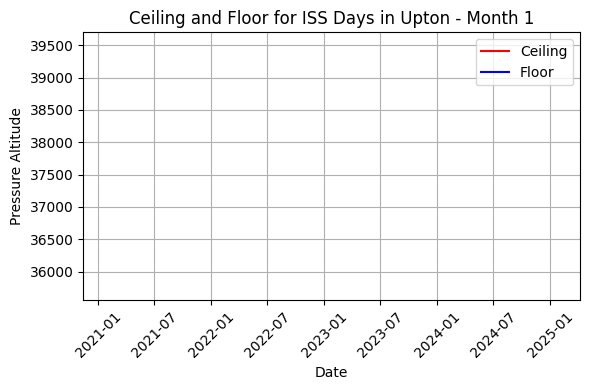

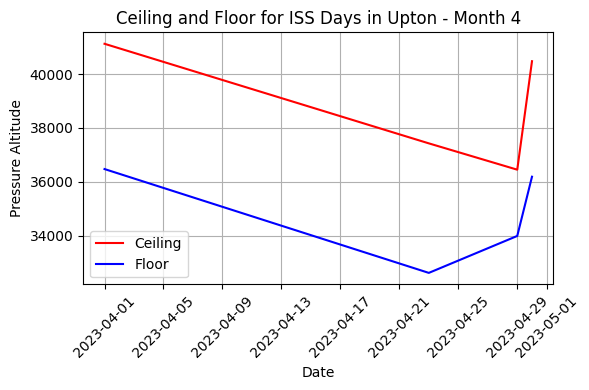

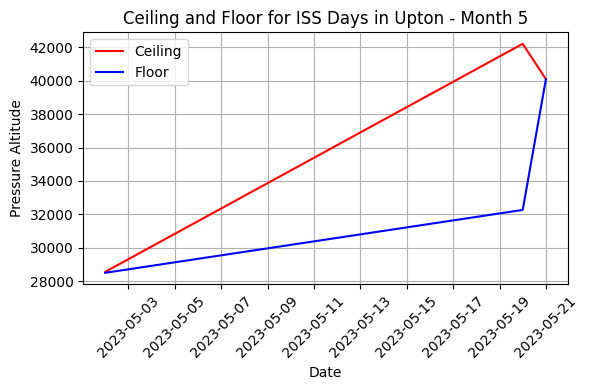

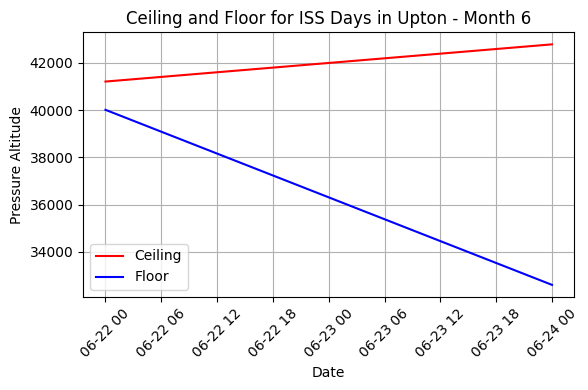

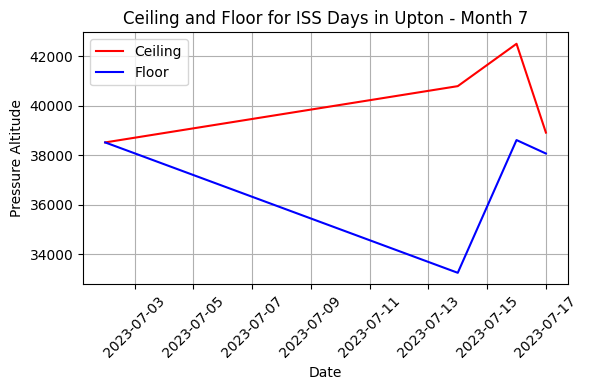

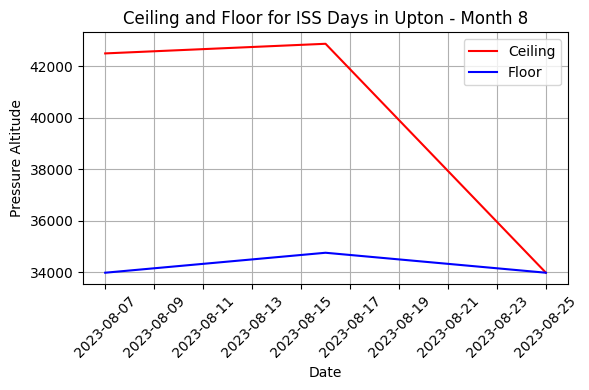

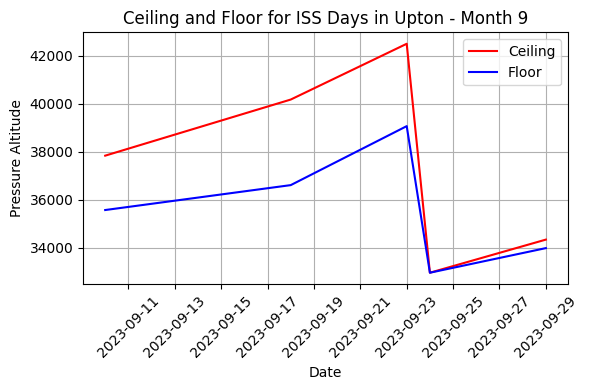

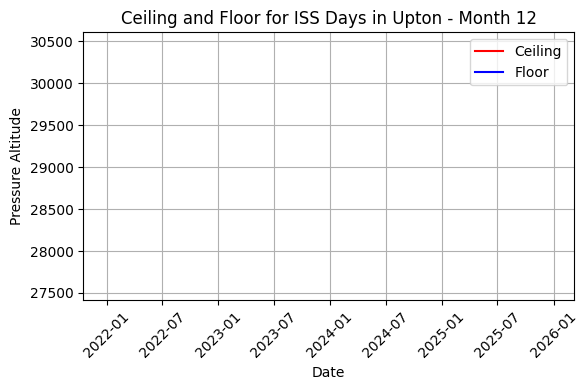

In [216]:
#This cell plots all ceiling and floors for each day ISSC occurred. 
issc_yes_df = df_clean[df_clean['issc'] == 'yes']

grouped_data = issc_yes_df.groupby('month')

for month, group in grouped_data:
    agg_df = group.groupby("date").agg({'ceiling': 'max', 'floor': 'max'}).reset_index()

    plt.figure(figsize=(6,4))
    plt.plot(agg_df['date'], agg_df['ceiling'], color='red', label='Ceiling')
    plt.plot(agg_df['date'], agg_df['floor'], color='blue', label='Floor')
    plt.xlabel('Date')
    plt.ylabel('Pressure Altitude')
    plt.title(f"Ceiling and Floor for ISS Days in {city} - Month {month}")
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


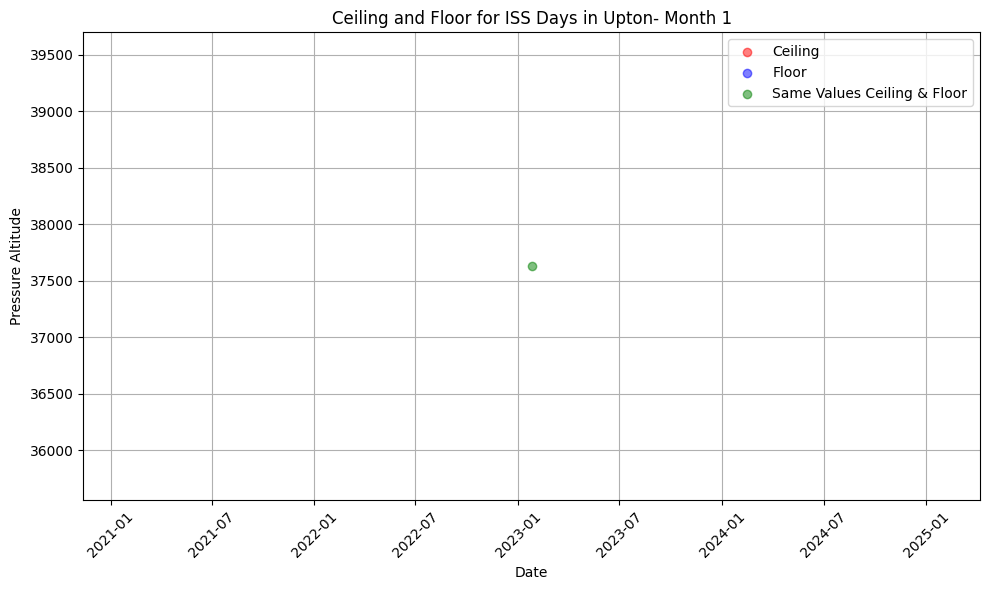

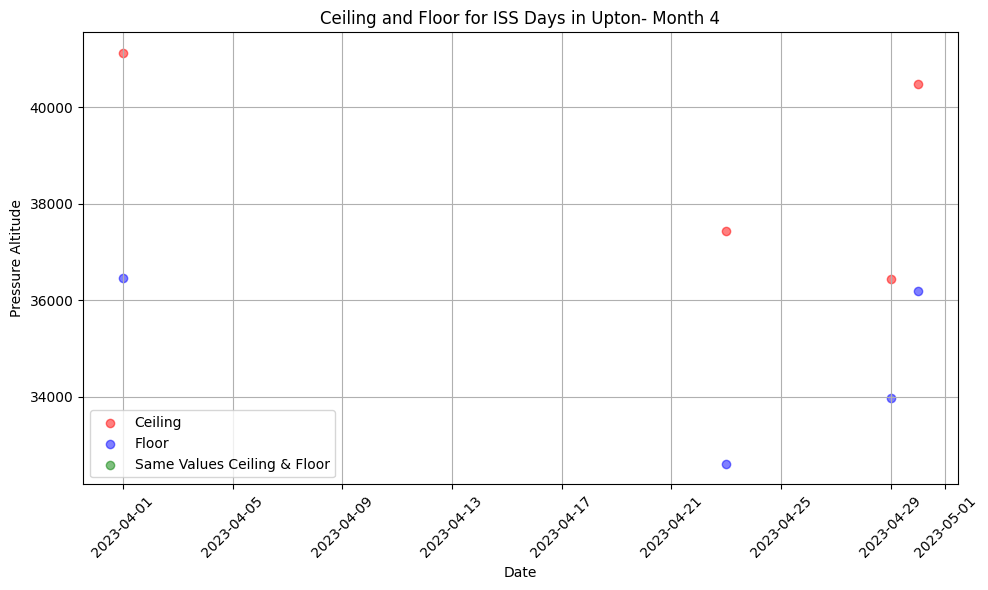

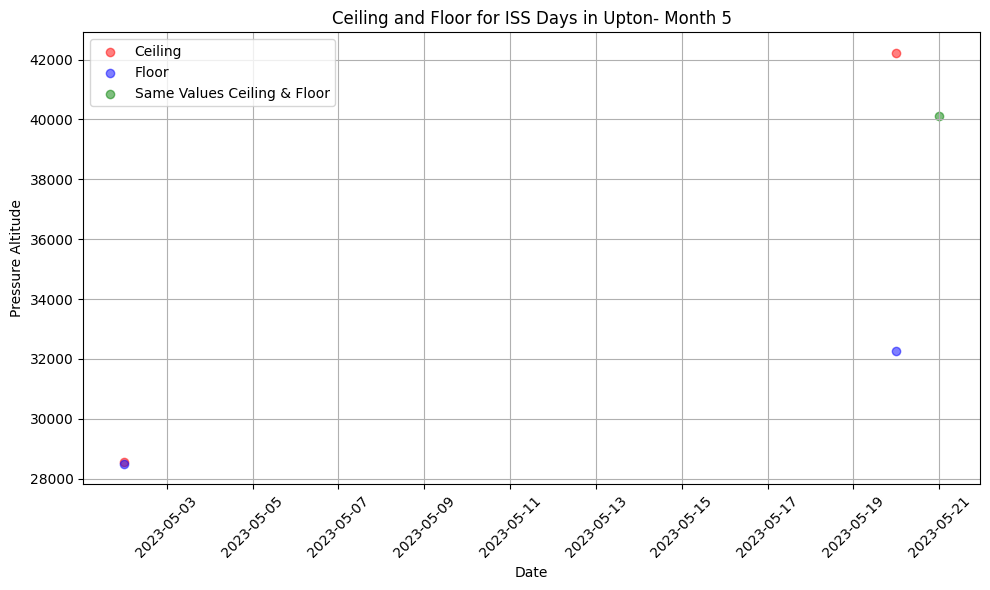

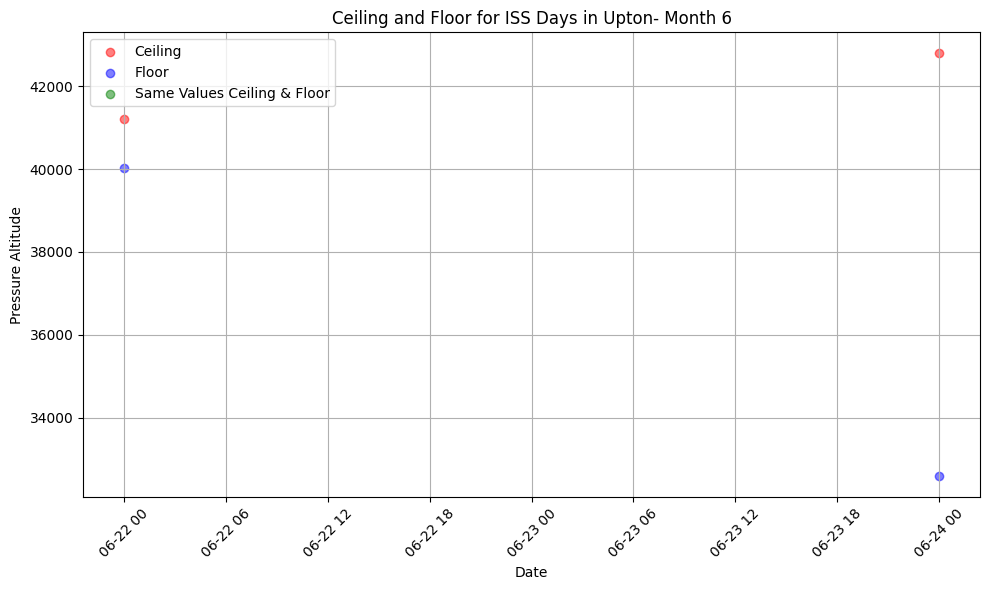

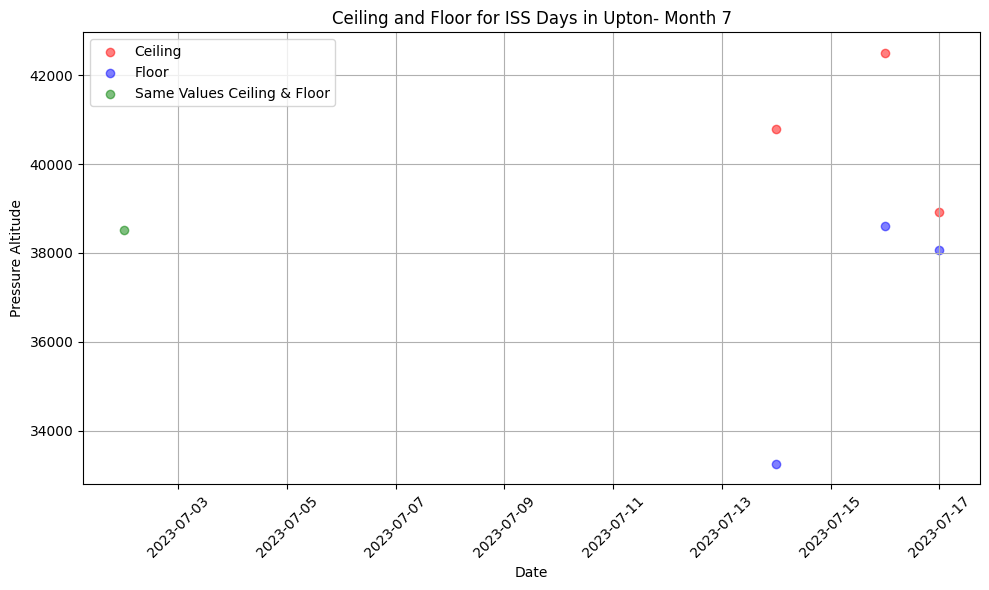

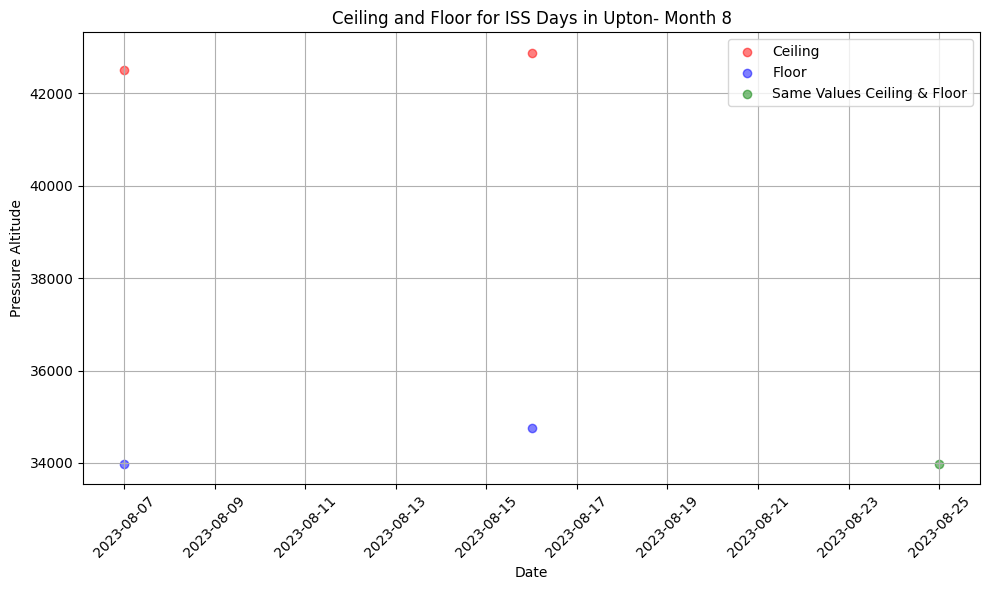

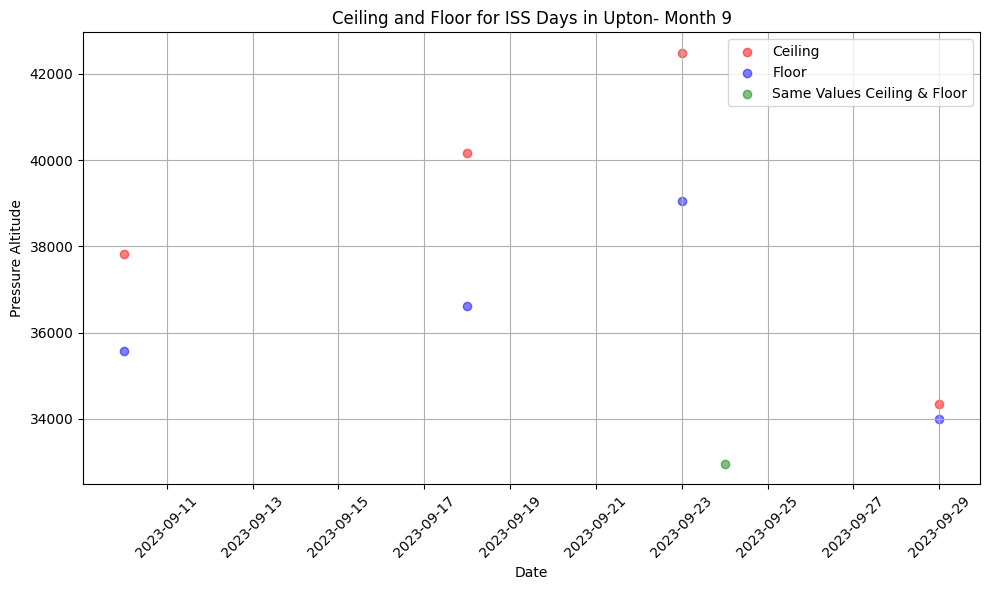

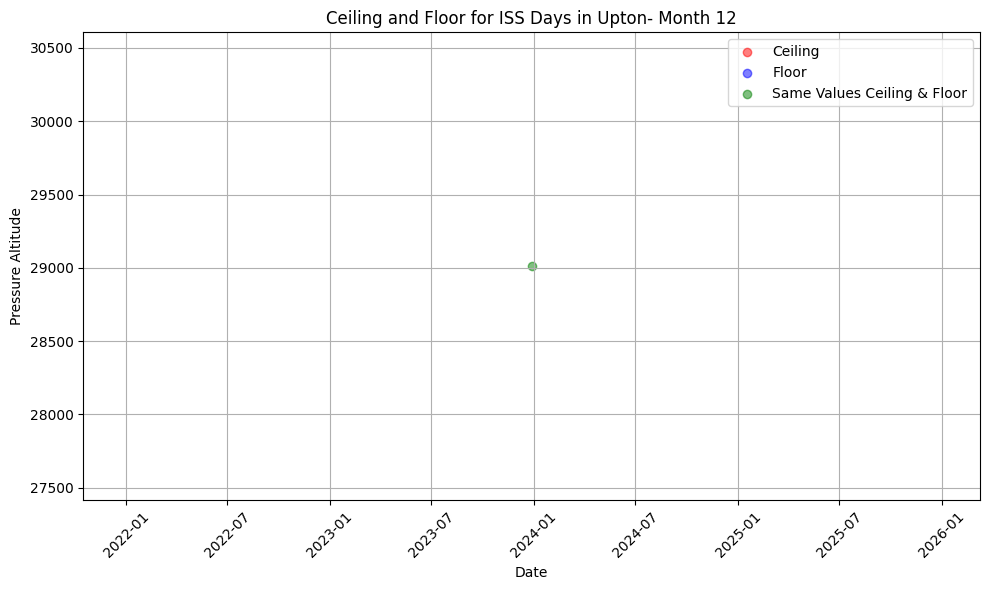

In [217]:
#This cell plots the exact points for each ceiling and floor. These plots offer a little more granularity compared to
#the previous plot. This is because these plots plot multiple occurences of ISSC in a day. 
for month, group in grouped_data:
    plt.figure(figsize=(10, 6))
    
    # Replace zero values with NaN. This makes sure that values of 0 are not included in plot.
    group['ceiling'] = group['ceiling'].replace(0, np.nan)
    group['floor'] = group['floor'].replace(0, np.nan)
    
    #Assign a variable that stores values when ceiling and floor are the same
    same_values = group['ceiling'] == group['floor']
    
    #Plots points where they are different for ceiling
    plt.scatter(group.loc[~same_values, 'date'], group.loc[~same_values, 'ceiling'],\
                color='red', label='Ceiling', alpha=0.5)
    
    #Plots points where they are different for floor
    plt.scatter(group.loc[~same_values, 'date'], group.loc[~same_values, 'floor'],\
                color='blue', label='Floor', alpha=0.5)
    
    #Plots points where they are the same for floor and ceiling
    plt.scatter(group.loc[same_values, 'date'], group.loc[same_values, 'ceiling'],\
                color='green', label='Same Values Ceiling & Floor', alpha=0.5)
    
    plt.xlabel('Date')
    plt.ylabel('Pressure Altitude')
    plt.title(f'Ceiling and Floor for ISS Days in {city}- Month {month}')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

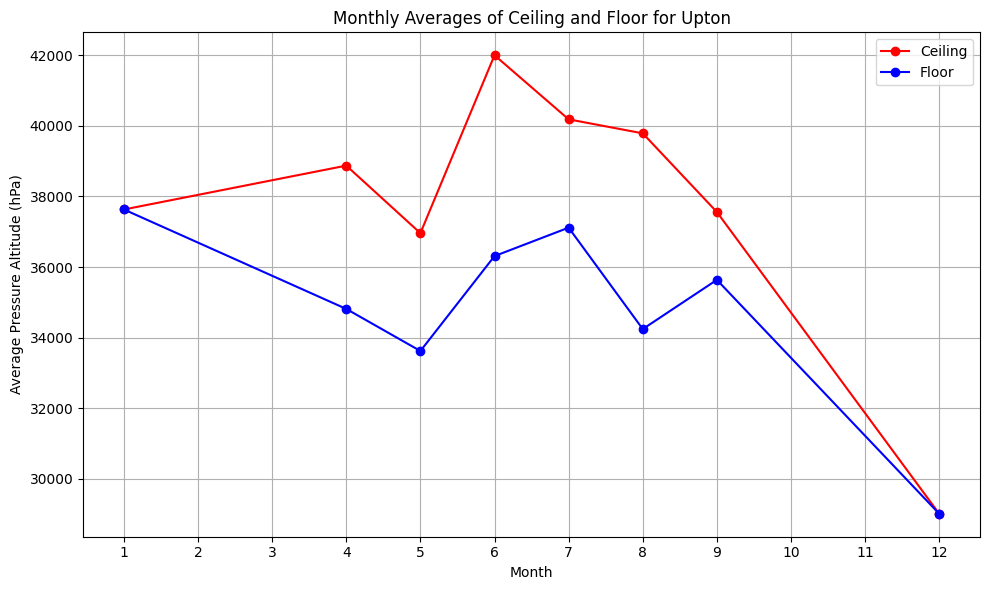

In [218]:
#This cell plots the monthly averages of ceiling and floor 
ceiling_val = issc_yes_df[issc_yes_df['ceiling'] != 0].groupby('month').agg({'ceiling': 'mean'}).reset_index()
floor_val = issc_yes_df[issc_yes_df['floor'] != 0].groupby('month').agg({'floor': 'mean'}).reset_index()

plt.figure(figsize=(10, 6))

plt.plot(ceiling_val['month'], ceiling_val['ceiling'], color='red', marker='o', label='Ceiling')

plt.plot(floor_val['month'], floor_val['floor'], color='blue', marker='o', label='Floor')

plt.xlabel('Month')
plt.ylabel('Average Pressure Altitude (hPa)')
plt.title(f'Monthly Averages of Ceiling and Floor for {city}')
plt.legend()
plt.grid(True)
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()

## Export to CSV

In [219]:
#Exported DataFrame
df_final = df_clean
df_final.drop(columns = ['level_0', 'level_1'], inplace = True)
df_final

,id_,year,month,day,hour,reltime,numlev,p_src,np_src,lat,...,daily_drift [miles],temp_f,temp_k,press_alt,rh_ice,issc,new_lat,new_long,floor,ceiling
0,#USM00072501,2023,1,1,12,1106,144,ncdc-nws,ncdc-gts,40.865,...,47.534399,49.28,282.75,204.26,0.961,no,40.865000,-72.862800,0.0,0.0
1,#USM00072501,2023,1,1,12,1106,144,ncdc-nws,ncdc-gts,40.865,...,47.534399,50.72,283.55,363.37,0.897,no,40.864726,-72.862551,0.0,0.0
2,#USM00072501,2023,1,1,12,1106,144,ncdc-nws,ncdc-gts,40.865,...,47.534399,51.62,284.05,564.00,0.833,no,40.864096,-72.862406,0.0,0.0
3,#USM00072501,2023,1,1,12,1106,144,ncdc-nws,ncdc-gts,40.865,...,47.534399,51.80,284.15,863.67,0.781,no,40.867033,-72.862094,0.0,0.0
4,#USM00072501,2023,1,1,12,1106,144,ncdc-nws,ncdc-gts,40.865,...,47.534399,51.26,283.85,1131.57,0.738,no,40.867040,-72.862872,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69125,#USM00072501,2023,12,31,12,1108,216,ncdc-nws,ncdc-gts,40.865,...,44.762462,-9999.00,-9999.00,-99.99,-9999.000,no,40.865000,-72.862800,0.0,0.0
69126,#USM00072501,2023,12,31,12,1108,216,ncdc-nws,ncdc-gts,40.865,...,44.762462,-9999.00,-9999.00,-99.99,-9999.000,no,40.865000,-72.862800,0.0,0.0
69127,#USM00072501,2023,12,31,12,1108,216,ncdc-nws,ncdc-gts,40.865,...,44.762462,-9999.00,-9999.00,-99.99,-9999.000,no,40.865000,-72.862800,0.0,0.0
69128,#USM00072501,2023,12,31,12,1108,216,ncdc-nws,ncdc-gts,40.865,...,44.762462,-9999.00,-9999.00,-99.99,-9999.000,no,40.865000,-72.862800,0.0,0.0


In [220]:
df_final.to_csv(f'{city}_issr.csv', index = False)